In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm


In [44]:
df = pd.read_excel("/Users/evenbakke/Documents/Master Thesis/MasterThesis-/Data 2.0/Final Data with 2024.xlsx")
df.set_index("DateTime", inplace=True)
df.sort_index(ascending=True)
df

,System Price,NO1 Price,NO2 Price,NO3 Price,NO4 Price,NO5 Price,SE1 Price,SE2 Price,SE3 Price,SE4 Price,...,Public holiday,Winter Time,Total Consumption,Total Production,System Price Lag 1,System Price Lag 2,System Price Lag 3,System Price Lag 24,System Price Lag 48,System Price Lag 168
DateTime,,,,,,,,,,,,,,,,,,,,,
2018-01-08 00:00:00,26.433792,27.38,27.38,25.87,25.87,27.38,25.03,25.03,25.03,25.03,...,0,1,38819.0,31147.0,27.711765,28.901232,28.901232,27.852570,29.405448,26.263485
2018-01-08 01:00:00,25.375743,26.25,26.25,25.21,25.21,26.25,23.96,23.96,23.96,23.96,...,0,1,37994.0,29786.0,26.433792,27.711765,28.901232,27.163296,28.506978,26.382834
2018-01-08 02:00:00,25.385130,25.66,25.66,24.89,24.89,25.66,23.92,23.92,23.92,23.92,...,0,1,37499.0,29179.0,25.375743,26.433792,27.711765,26.583984,28.138203,26.043561
2018-01-08 03:00:00,25.555437,25.65,25.65,25.48,25.48,25.65,25.48,25.48,25.48,25.48,...,0,1,37307.0,29291.0,25.385130,25.375743,26.433792,26.554482,27.958509,24.585894
2018-01-08 04:00:00,25.955055,26.12,26.12,26.12,26.12,26.12,26.12,26.12,26.12,26.12,...,0,1,37421.0,30072.0,25.555437,25.385130,25.375743,26.534367,28.107360,24.626124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 19:00:00,47.840000,35.96,60.67,21.00,21.00,35.96,21.00,21.00,21.00,107.94,...,0,0,37079.0,43736.0,46.380000,40.630000,34.110000,53.600000,41.990000,49.980000
2024-05-31 20:00:00,43.780000,35.15,60.68,18.59,18.59,35.15,18.59,18.59,18.59,115.00,...,0,0,36018.0,42792.0,47.840000,46.380000,40.630000,52.650000,45.730000,43.380000
2024-05-31 21:00:00,39.950000,35.86,59.08,16.08,16.08,35.86,16.08,16.08,16.08,107.91,...,0,0,35363.0,42254.0,43.780000,47.840000,46.380000,49.310000,42.810000,41.870000


# System Price time series analysis

## Overview of the time series 

In [45]:

statistics_summary = df['System Price'].describe()
print(statistics_summary)


count    56064.000000
mean        57.614014
std         61.539366
min        -29.868093
25%         26.517401
50%         42.165756
75%         62.941176
max        706.681920
Name: System Price, dtype: float64


In [46]:
grouped_by_year = df['System Price'].groupby(df.index.year)

yearly_descriptive_stats = grouped_by_year.describe()

yearly_descriptive_stats


,count,mean,std,min,25%,50%,75%,max
DateTime,,,,,,,,
2018,8592.0,44.235879,9.832711,2.171079,38.499775,44.811526,50.391763,197.997309
2019,8760.0,38.927943,8.119782,2.309775,34.527454,38.679023,42.712761,84.980974
2020,8784.0,10.925213,8.248043,-0.929313,4.320702,8.545522,16.620354,51.026391
2021,8760.0,62.327022,42.643914,-0.079355,38.554425,52.067640,73.030137,420.095955
2022,8760.0,135.848534,107.672871,0.000000,50.888880,123.690336,181.312656,706.681920
2023,8760.0,56.386949,37.965055,-29.868093,24.742120,54.897858,84.843729,214.488927
2024,3648.0,50.179285,25.864653,-10.060000,35.360000,50.645000,64.602500,254.580000


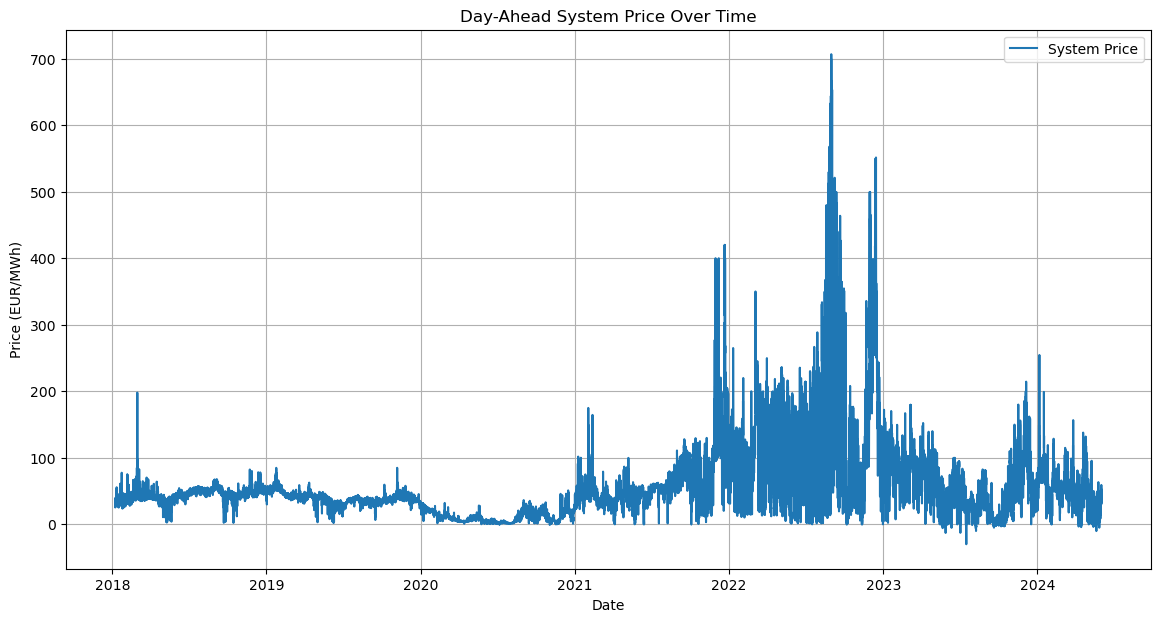

/Users/evenbakke/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


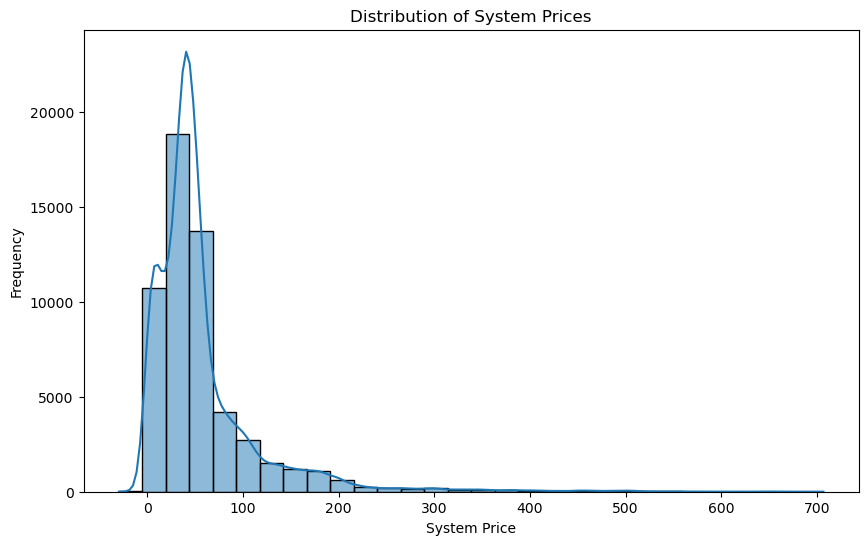

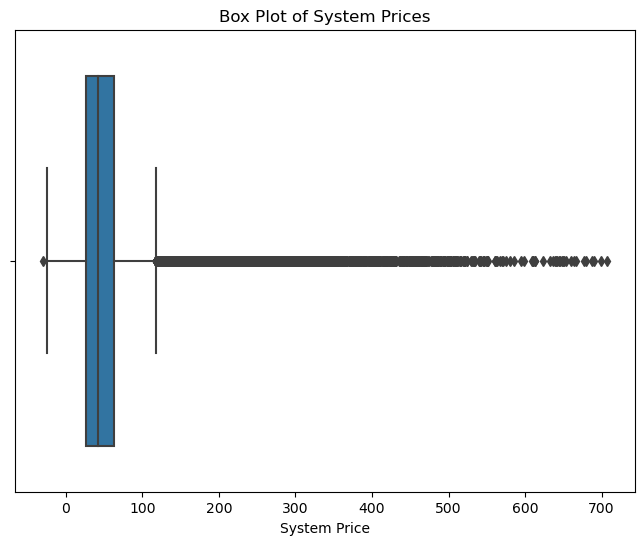

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Time Series Plot
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['System Price'], label='System Price')
plt.title('Day-Ahead System Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (EUR/MWh)')
plt.legend()
plt.grid(True)
plt.show()

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['System Price'], bins=30, kde=True)
plt.title('Distribution of System Prices')
plt.xlabel('System Price')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['System Price'])
plt.title('Box Plot of System Prices')
plt.xlabel('System Price')
plt.show()


## Subsetting 2023/2024

In [48]:
df = df.loc["2023":"2024"]

In [49]:
df

,System Price,NO1 Price,NO2 Price,NO3 Price,NO4 Price,NO5 Price,SE1 Price,SE2 Price,SE3 Price,SE4 Price,...,Public holiday,Winter Time,Total Consumption,Total Production,System Price Lag 1,System Price Lag 2,System Price Lag 3,System Price Lag 24,System Price Lag 48,System Price Lag 168
DateTime,,,,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,23.374971,119.32,119.32,23.35,23.35,119.32,2.01,2.01,2.01,2.01,...,1,1,42673.0,39038.0,26.945856,27.706560,29.804544,1.739136,19.618368,94.948224
2023-01-01 01:00:00,21.639717,108.83,108.83,23.28,23.28,108.83,1.38,1.38,1.38,1.38,...,1,1,42340.0,38588.0,23.374971,26.945856,27.706560,0.849408,17.119872,79.386048
2023-01-01 02:00:00,16.006176,102.39,102.39,23.37,23.37,102.39,0.09,0.09,0.09,0.09,...,1,1,42299.0,37740.0,21.639717,23.374971,26.945856,0.130368,10.823232,77.957376
2023-01-01 03:00:00,11.428002,92.36,92.36,23.67,23.67,92.36,0.08,0.08,0.08,0.08,...,1,1,42040.0,37139.0,16.006176,21.639717,23.374971,0.079296,4.476864,75.348672
2023-01-01 04:00:00,4.637178,82.66,82.66,24.12,24.12,82.66,0.05,0.05,0.05,0.05,...,1,1,42031.0,36896.0,11.428002,16.006176,21.639717,0.099456,4.577664,75.808320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 19:00:00,47.840000,35.96,60.67,21.00,21.00,35.96,21.00,21.00,21.00,107.94,...,0,0,37079.0,43736.0,46.380000,40.630000,34.110000,53.600000,41.990000,49.980000
2024-05-31 20:00:00,43.780000,35.15,60.68,18.59,18.59,35.15,18.59,18.59,18.59,115.00,...,0,0,36018.0,42792.0,47.840000,46.380000,40.630000,52.650000,45.730000,43.380000
2024-05-31 21:00:00,39.950000,35.86,59.08,16.08,16.08,35.86,16.08,16.08,16.08,107.91,...,0,0,35363.0,42254.0,43.780000,47.840000,46.380000,49.310000,42.810000,41.870000


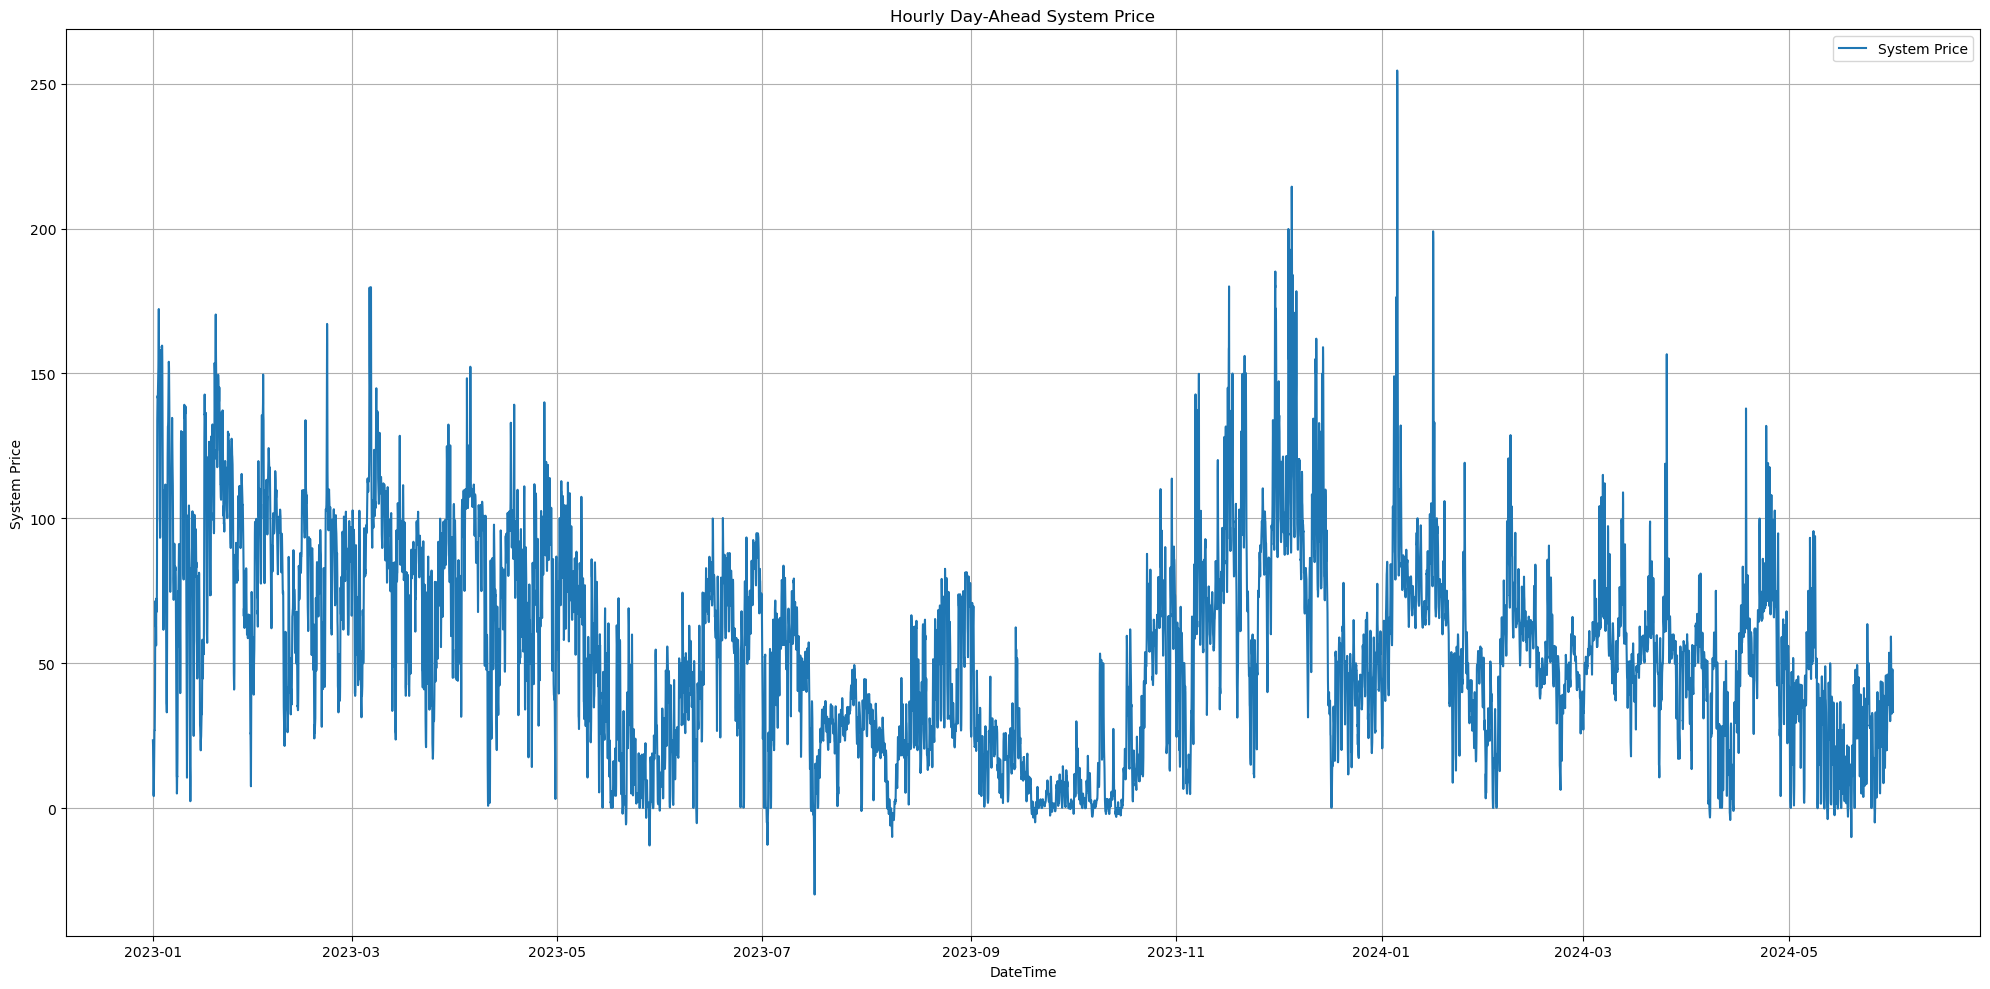

In [50]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 10)) 
plt.plot(df.index, df['System Price'], label='System Price')  
plt.title('Hourly Day-Ahead System Price')  
plt.xlabel('DateTime')  
plt.ylabel('System Price') 
plt.legend()  
plt.grid(True)
plt.tight_layout()  


plt.show()

## Seasonal decompose from statsmodels

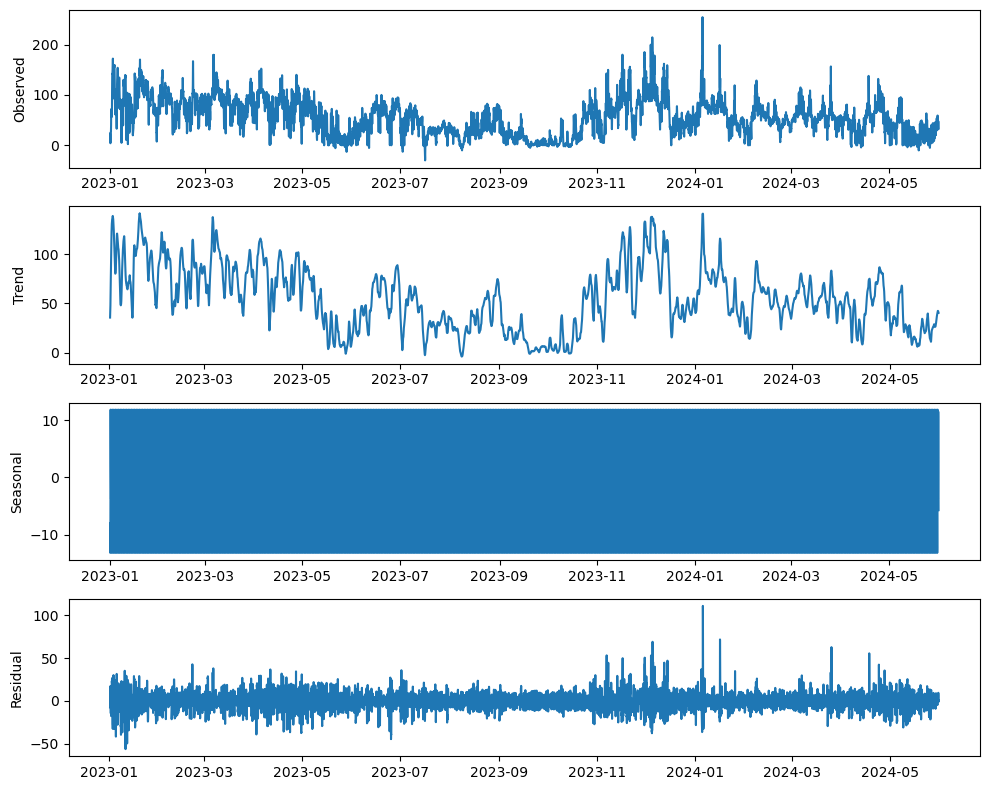

In [51]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

y = df["System Price"]


decomposition_additive = sm.tsa.seasonal_decompose(y, model='additive', period=24)


fig, axes = plt.subplots(4, 1, figsize=(10, 8))
axes[0].plot(decomposition_additive.observed)
axes[0].set_ylabel('Observed')
axes[1].plot(decomposition_additive.trend)
axes[1].set_ylabel('Trend')
axes[2].plot(decomposition_additive.seasonal)
axes[2].set_ylabel('Seasonal')
axes[3].plot(decomposition_additive.resid)
axes[3].set_ylabel('Residual')
plt.tight_layout()


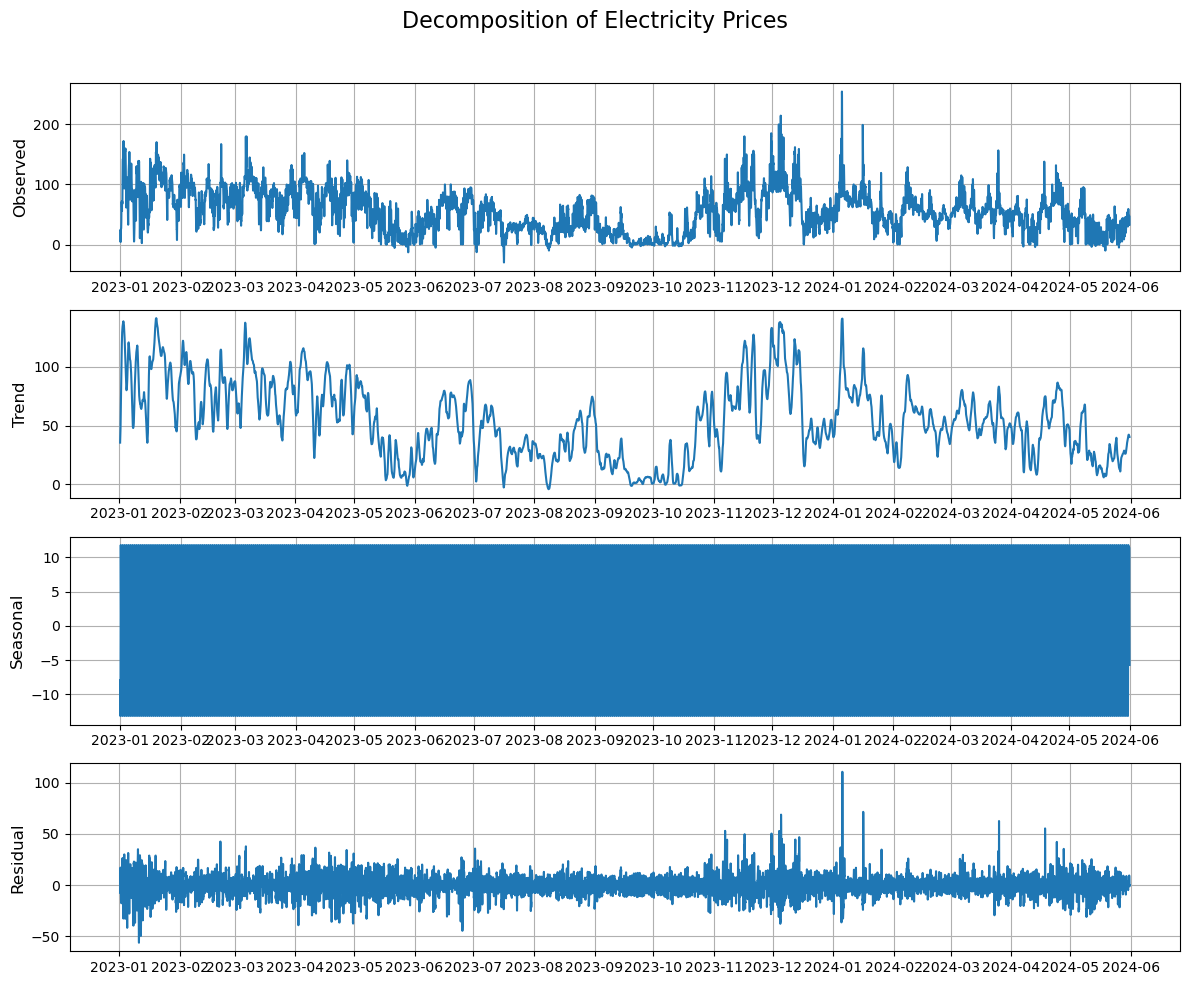

In [52]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


y = df["System Price"]


decomposition_additive = sm.tsa.seasonal_decompose(y, model='additive', period=24)


fig, axes = plt.subplots(4, 1, figsize=(12, 10))
fig.suptitle('Decomposition of Electricity Prices', fontsize=16)


date_format = mdates.DateFormatter('%Y-%m-%d')
plt.gca().xaxis.set_major_formatter(date_format)


axes[0].plot(decomposition_additive.observed)
axes[0].set_ylabel('Observed', fontsize=12)
axes[0].grid(True)

axes[1].plot(decomposition_additive.trend)
axes[1].set_ylabel('Trend', fontsize=12)
axes[1].grid(True)

axes[2].plot(decomposition_additive.seasonal)
axes[2].set_ylabel('Seasonal', fontsize=12)
axes[2].grid(True)

axes[3].plot(decomposition_additive.resid)
axes[3].set_ylabel('Residual', fontsize=12)
axes[3].grid(True)


plt.tight_layout(rect=[0, 0, 1, 0.96])  


for ax in axes:
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.show()



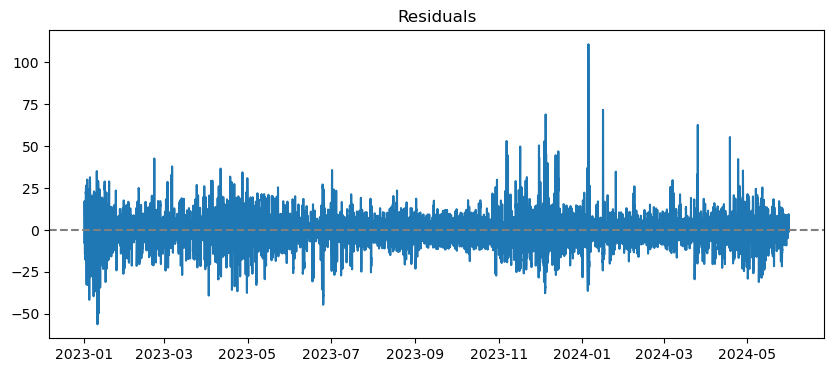

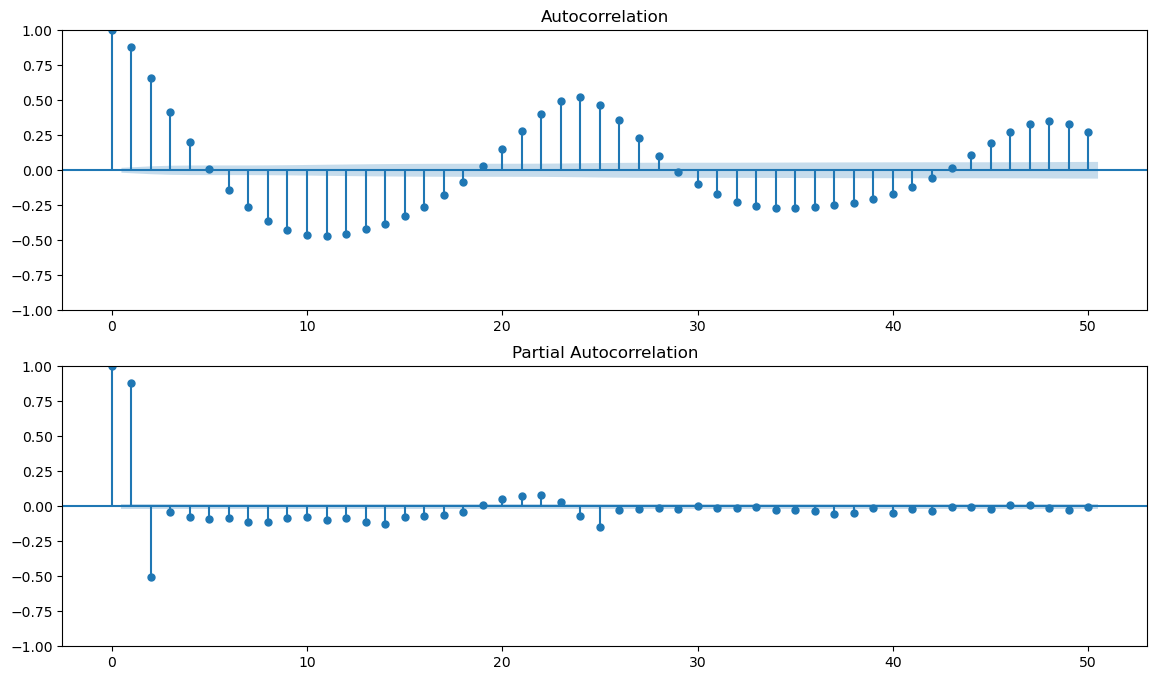

         lb_stat  lb_pvalue
24  46898.171342        0.0
ADF Statistic: -27.936284476631066
p-value: 0.0
Critical Values: {'1%': -3.4308799514335413, '5%': -2.861774211903994, '10%': -2.5668946659858065}


In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller


residuals = decomposition_additive.resid.dropna() 


plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals')
plt.axhline(0, linestyle='--', color='gray')
plt.show()


fig, ax = plt.subplots(2, 1, figsize=(14, 8))
plot_acf(residuals, lags=50, ax=ax[0])  
plot_pacf(residuals, lags=50, ax=ax[1])  
plt.show()


# Perform Ljung-Box test and output the results
lb_results = acorr_ljungbox(residuals, lags=[24], return_df=True)
print(lb_results)


# Augmented Dickey-Fuller Test
adf_result = adfuller(residuals)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')
print(f'Critical Values: {adf_result[4]}')




### Zooming in on the seasonal component 

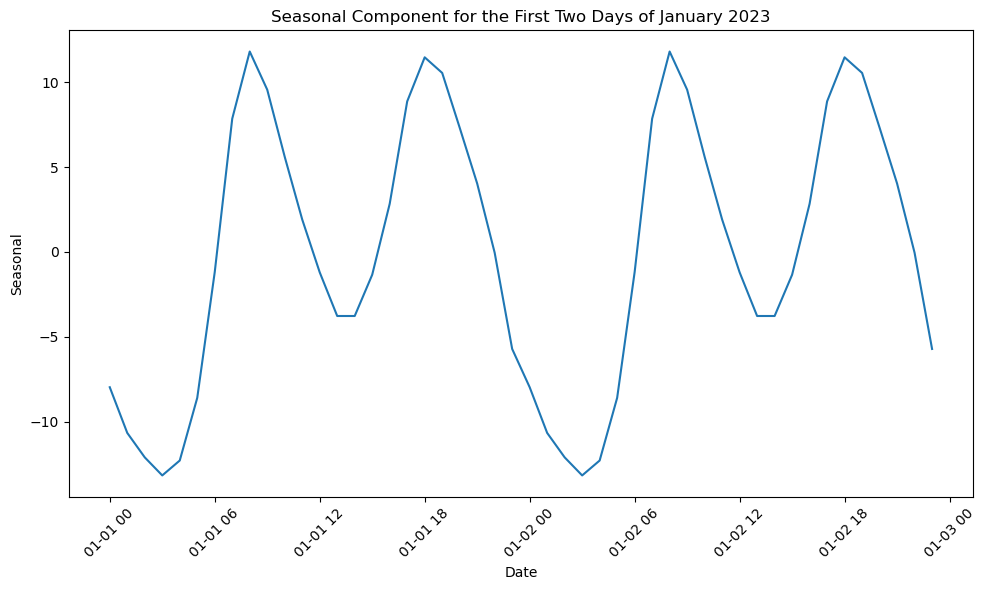

In [54]:

seasonal_component = decomposition_additive.seasonal['2023-01-01':'2023-01-02']

plt.figure(figsize=(10, 6))
plt.plot(seasonal_component)
plt.title('Seasonal Component for the First Two Days of January 2023')
plt.ylabel('Seasonal')
plt.xlabel('Date')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()


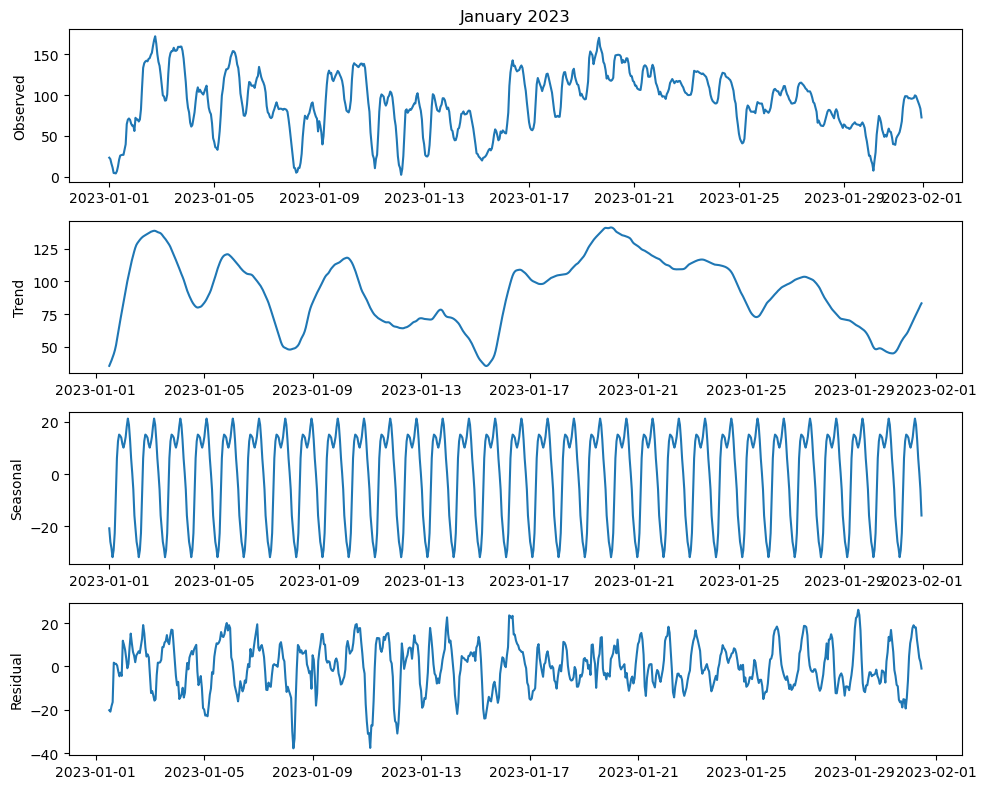

In [55]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt


y_january = df["System Price"]['2023-01-01':'2023-01-31']


decomposition_additive_january = sm.tsa.seasonal_decompose(y_january, model='additive', period=24)


fig, axes = plt.subplots(4, 1, figsize=(10, 8))
axes[0].plot(decomposition_additive_january.observed)
axes[0].set_ylabel('Observed')
axes[0].set_title('January 2023')
axes[1].plot(decomposition_additive_january.trend)
axes[1].set_ylabel('Trend')
axes[2].plot(decomposition_additive_january.seasonal)
axes[2].set_ylabel('Seasonal')
axes[3].plot(decomposition_additive_january.resid)
axes[3].set_ylabel('Residual')
plt.tight_layout()
plt.show()


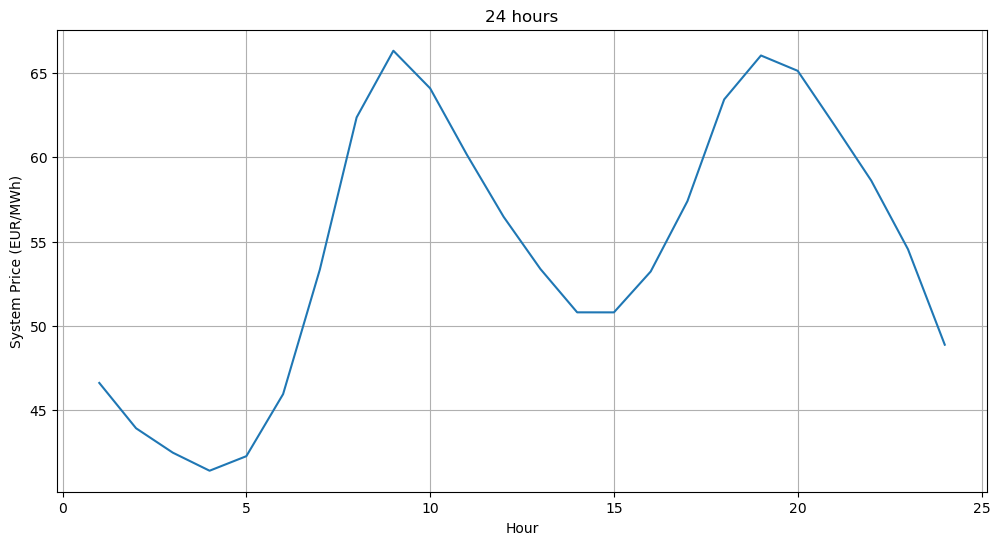

In [57]:
import pandas as pd
import matplotlib.pyplot as plt


daily_avg = df.groupby(df.index.hour).mean()

# Plot daily averages
plt.figure(figsize=(12, 6))
plt.plot(range(1, 25), daily_avg['System Price'])  
plt.title('24 hours')
plt.xlabel('Hour')
plt.ylabel('System Price (EUR/MWh)')
plt.xticks([0, 5, 10, 15, 20, 25])  
plt.grid(True)
plt.show()


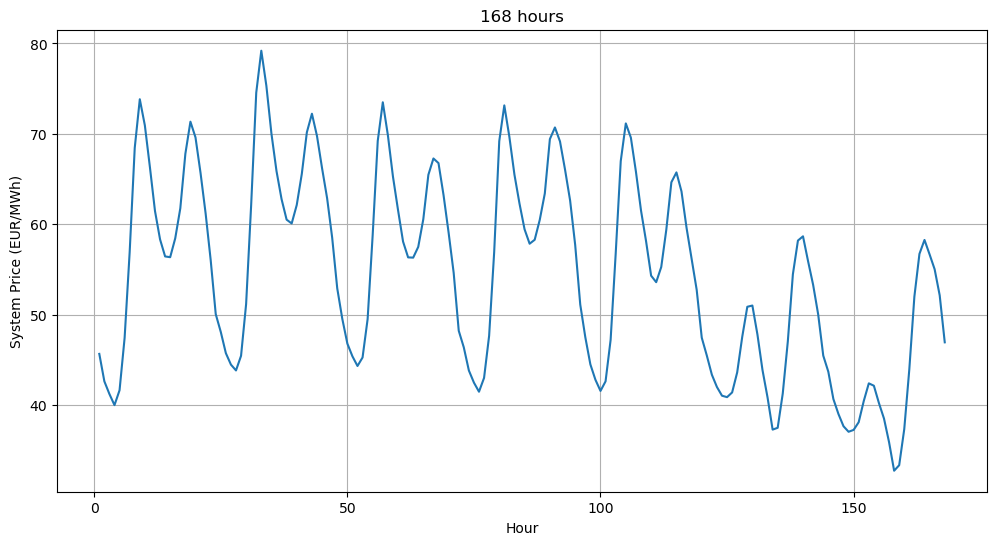

In [58]:
import pandas as pd
import matplotlib.pyplot as plt


weekly_avg = df.groupby([df.index.dayofweek, df.index.hour]).mean()


hourly_weekly_avg = [weekly_avg.loc[(day, hour), 'System Price'] for day in range(7) for hour in range(24)]

# Plot weekly averages
plt.figure(figsize=(12, 6)) 
plt.plot(range(1, 169), hourly_weekly_avg, linestyle='-')
plt.title('168 hours')
plt.xlabel('Hour')
plt.ylabel('System Price (EUR/MWh)')


plt.xticks(range(0, 169, 50))  


plt.grid(True)


plt.show()


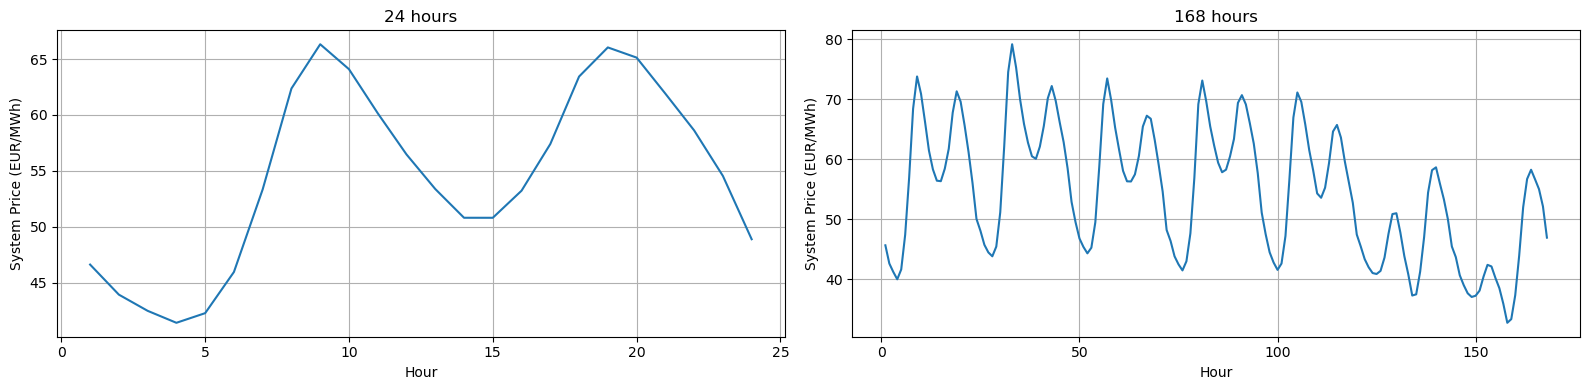

In [59]:
import pandas as pd
import matplotlib.pyplot as plt


daily_avg = df.groupby(df.index.hour).mean()


weekly_avg = df.groupby([df.index.dayofweek, df.index.hour]).mean()


hourly_weekly_avg = [weekly_avg.loc[(day, hour), 'System Price'] for day in range(7) for hour in range(24)]


fig, axes = plt.subplots(1, 2, figsize=(16, 4))  


axes[0].plot(range(1, 25), daily_avg['System Price'])  
axes[0].set_title('24 hours')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('System Price (EUR/MWh)')
axes[0].set_xticks([0, 5, 10, 15, 20, 25]) 
axes[0].grid(True)

# Plot weekly averages
axes[1].plot(range(1, 169), hourly_weekly_avg, linestyle='-')
axes[1].set_title('168 hours')
axes[1].set_xlabel('Hour')
axes[1].set_ylabel('System Price (EUR/MWh)')
axes[1].set_xticks(range(0, 169, 50))  
axes[1].grid(True)

plt.tight_layout()  
plt.show()


# ACF and PACF (Autocorrelation)

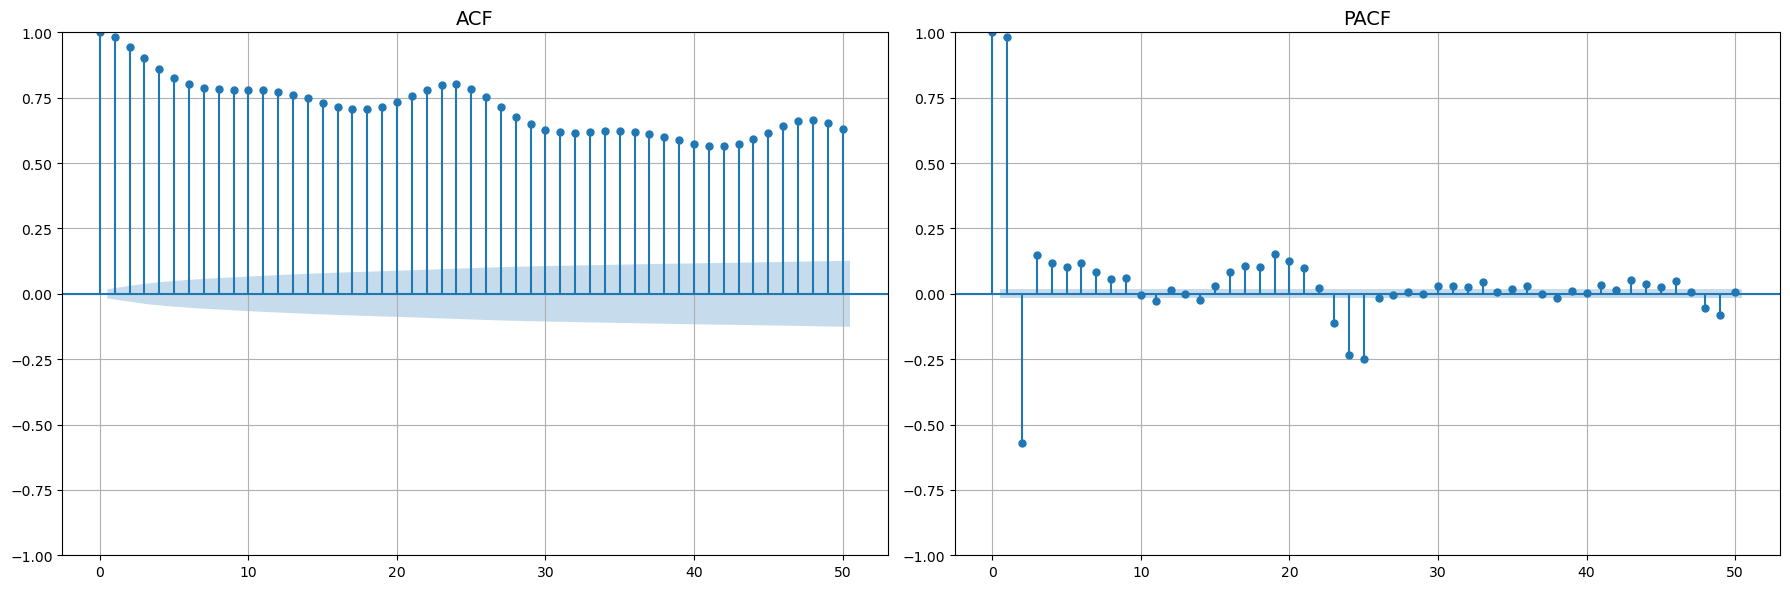

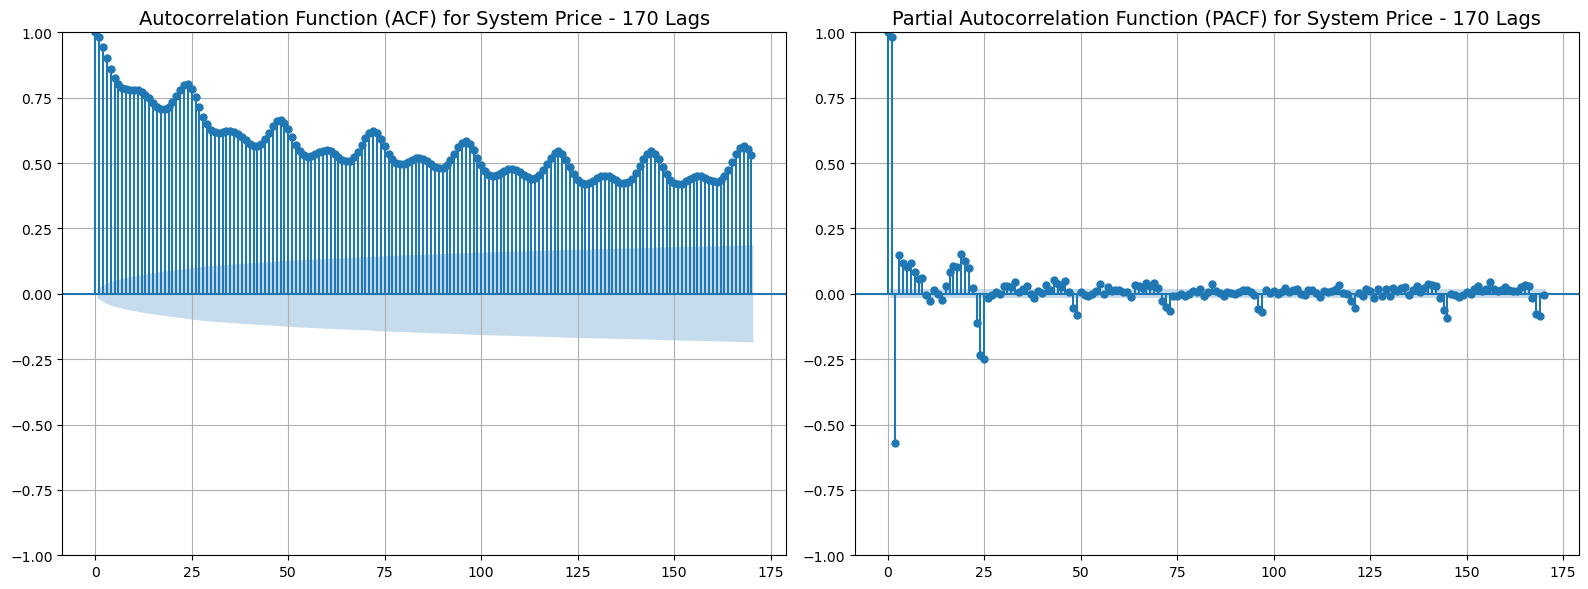

In [60]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))  

plot_acf(df['System Price'], lags=50, alpha=0.05, ax=ax1)
ax1.set_title('ACF', fontsize=14)
#ax1.set_xlabel('Lags', fontsize=12)
#ax1.set_ylabel('Autocorrelation', fontsize=12)
ax1.grid(True)  


plot_pacf(df['System Price'], lags=50, alpha=0.05, ax=ax2)
ax2.set_title('PACF', fontsize=14)
#ax2.set_xlabel('Lags', fontsize=12)
#ax2.set_ylabel('Partial Autocorrelation', fontsize=12)
ax2.grid(True)  


plt.tight_layout()
plt.show()


fig2, (ax3, ax4) = plt.subplots(1, 2, figsize=(16, 6))  

plot_acf(df['System Price'], lags=170, alpha=0.05, ax=ax3)
ax3.set_title('Autocorrelation Function (ACF) for System Price - 170 Lags', fontsize=14)
#ax3.set_xlabel('Lags', fontsize=12)
#ax3.set_ylabel('Autocorrelation', fontsize=12)
ax3.grid(True)  

plot_pacf(df['System Price'], lags=170, alpha=0.05, ax=ax4)
ax4.set_title('Partial Autocorrelation Function (PACF) for System Price - 170 Lags', fontsize=14)
#ax4.set_xlabel('Lags', fontsize=12)
#ax4.set_ylabel('Partial Autocorrelation', fontsize=12)
ax4.grid(True)  

plt.tight_layout()
plt.show()



From the ACF plot, we see a strong and slowly decaying autocorrelation over time, which indicates non-stationarity in the data.

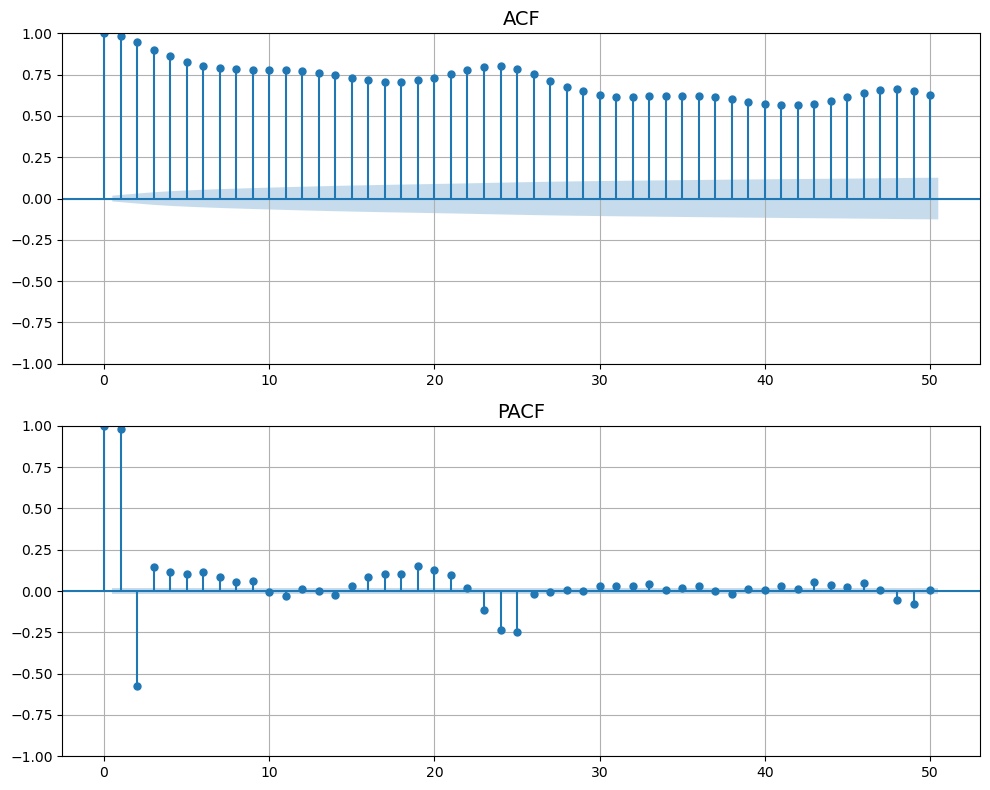

In [61]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))  

# Plot ACF
plot_acf(df['System Price'], lags=50, alpha=0.05, ax=ax1)
ax1.set_title('ACF', fontsize=14)
ax1.grid(True) 

# Plot PACF
plot_pacf(df['System Price'], lags=50, alpha=0.05, ax=ax2)
ax2.set_title('PACF', fontsize=14)
ax2.grid(True)  


plt.tight_layout()
plt.show()


## Tests for stationarity 

In [62]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.stattools import zivot_andrews  



ts = df['System Price']

# Augmented Dickey-Fuller Test
adf_result = adfuller(ts, autolag='AIC')
print("ADF Statistic: %f" % adf_result[0])
print("p-value: %f" % adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

# Kwiatkowski-Phillips-Schmidt-Shin Test
kpss_result = kpss(ts, regression='c', nlags='auto')
print("\nKPSS Statistic: %f" % kpss_result[0])
print("p-value: %f" % kpss_result[1])
print("Critical Values:")
for key, value in kpss_result[3].items():
    print('\t%s: %.3f' % (key, value))

# Zivot-Andrews Test 
za_result = zivot_andrews(ts)
print("\nZivot-Andrews Statistic: %f" % za_result[0])
print("p-value: %f" % za_result[1])
print("Critical Values:")
for key, value in za_result[2].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -6.753289
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567

KPSS Statistic: 2.425271
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/var/folders/f_/j_mdbrm574j13dk_c3yb57xm0000gn/T/ipykernel_3970/1889937792.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(ts, regression='c', nlags='auto')



Zivot-Andrews Statistic: -9.708405
p-value: 0.000010
Critical Values:
	1%: -5.276
	5%: -4.811
	10%: -4.566


### Removing trend component

In [63]:

df['detrended'] = df['System Price'].diff()

df = df.dropna()

/var/folders/f_/j_mdbrm574j13dk_c3yb57xm0000gn/T/ipykernel_3970/2545636535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['detrended'] = df['System Price'].diff()


In [64]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss
from arch.unitroot import ZivotAndrews


ts = df['detrended']


# Augmented Dickey-Fuller Test
adf_result = adfuller(ts, autolag='AIC')
print("ADF Statistic: %f" % adf_result[0])
print("p-value: %f" % adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

# Kwiatkowski-Phillips-Schmidt-Shin Test
kpss_result = kpss(ts, regression='c', nlags='auto')
print("\nKPSS Statistic: %f" % kpss_result[0])
print("p-value: %f" % kpss_result[1])
print("Critical Values:")
for key, value in kpss_result[3].items():
    print('\t%s: %.3f' % (key, value))

# Zivot-Andrews Test
za_result = ZivotAndrews(ts)
print("\nZivot-Andrews Statistic: %f" % za_result.stat)
print("p-value: %f" % za_result.pvalue)
print("Critical Values:")
for key, value in za_result.critical_values.items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -22.244879
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567

KPSS Statistic: 0.062022
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/var/folders/f_/j_mdbrm574j13dk_c3yb57xm0000gn/T/ipykernel_3970/1590068712.py:19: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(ts, regression='c', nlags='auto')



Zivot-Andrews Statistic: -22.278252
p-value: 0.000010
Critical Values:
	1%: -5.276
	5%: -4.811
	10%: -4.566


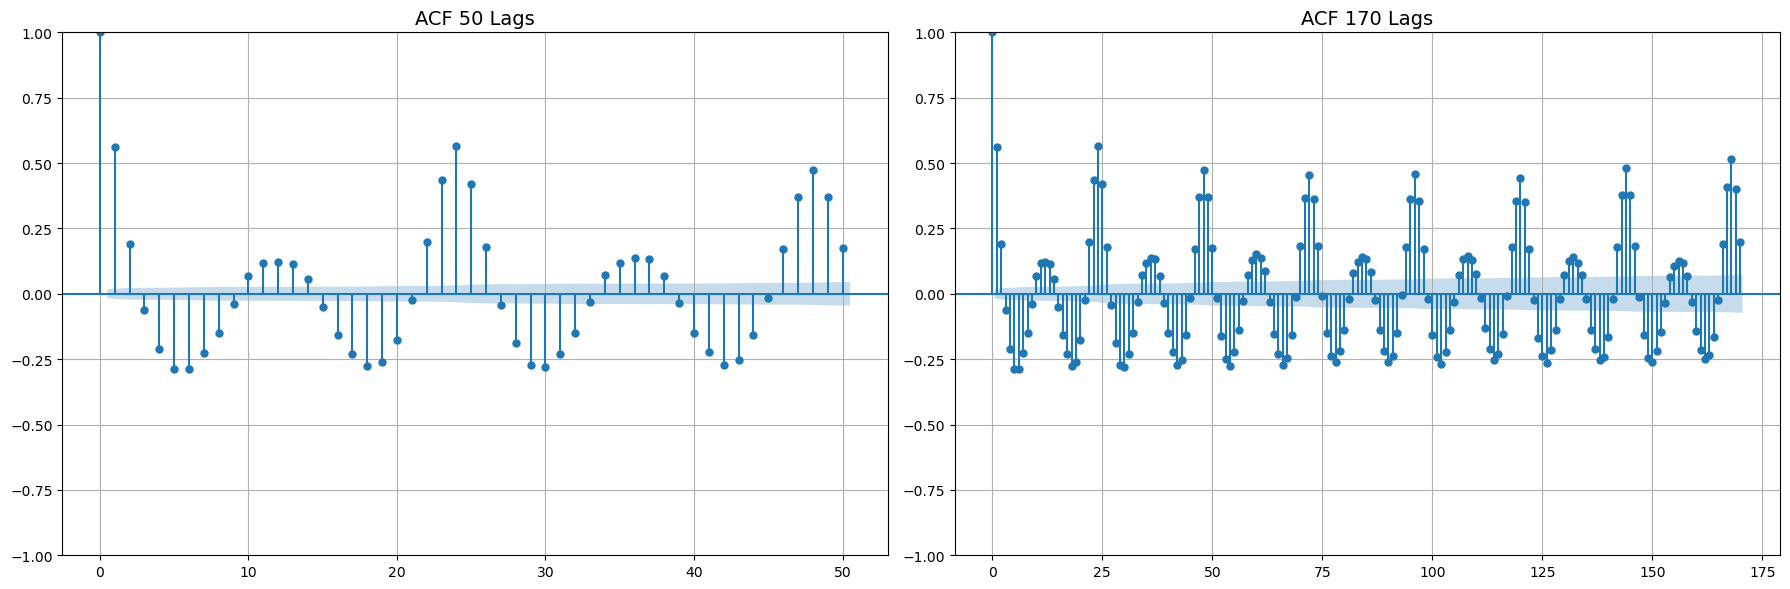

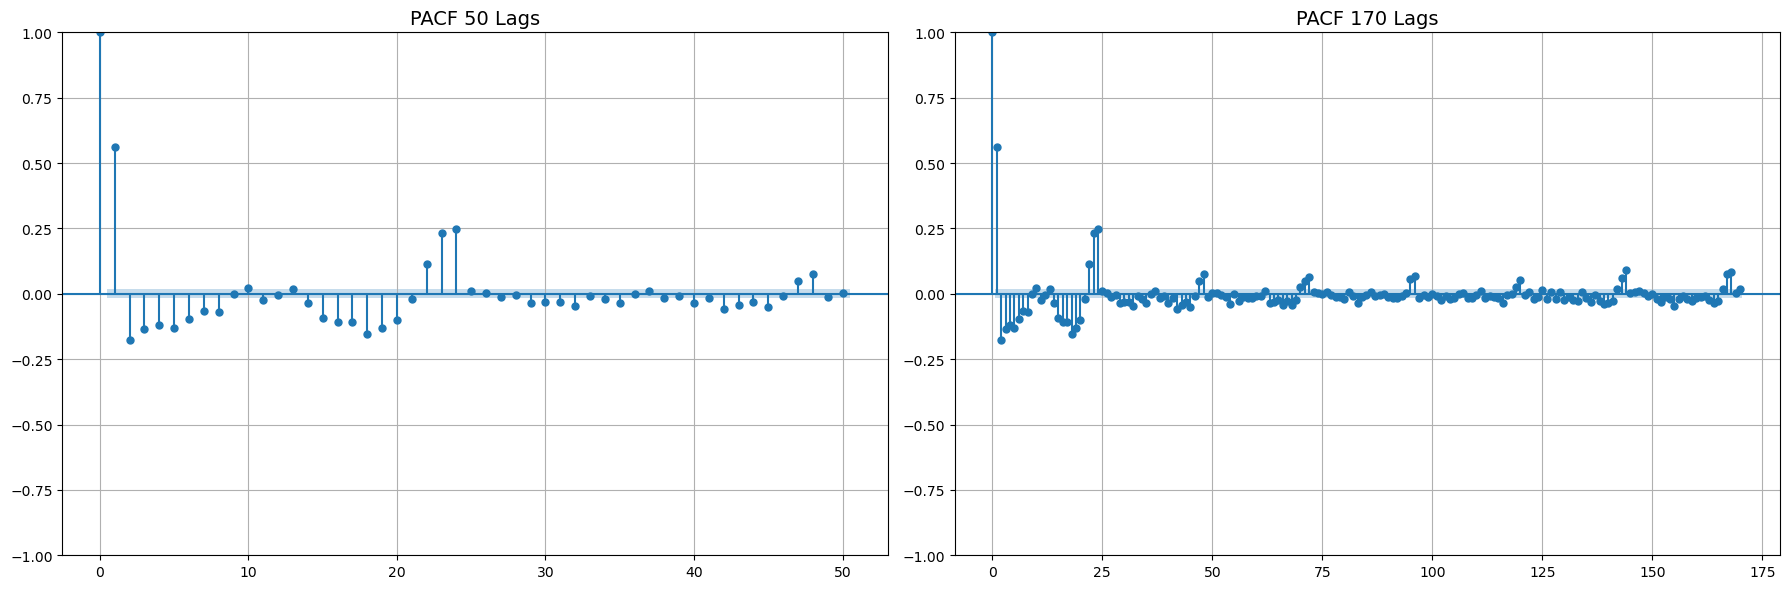

In [65]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))  


plot_acf(df['detrended'], lags=50, alpha=0.05, ax=ax1)
ax1.set_title('ACF 50 Lags', fontsize=14)
#ax1.set_xlabel('Lags', fontsize=12)
#ax1.set_ylabel('Autocorrelation', fontsize=12)
ax1.grid(True)  


plot_acf(df['detrended'], lags=170, alpha=0.05, ax=ax2)
ax2.set_title('ACF 170 Lags', fontsize=14)
#ax2.set_xlabel('Lags', fontsize=12)
#ax2.set_ylabel('Autocorrelation', fontsize=12)
ax2.grid(True)  

plt.tight_layout()
plt.show()

fig1, (ax3, ax4) = plt.subplots(1, 2, figsize=(18, 6))  


plot_pacf(df['detrended'], lags=50, alpha=0.05, ax=ax3)
ax3.set_title('PACF 50 Lags', fontsize=14)
#ax3.set_xlabel('Lags', fontsize=12)
#ax3.set_ylabel('Partial Autocorrelation', fontsize=12)
ax3.grid(True)  

# Second Plot with 170 Lags - PACF
plot_pacf(df['detrended'], lags=170, alpha=0.05, ax=ax4)
ax4.set_title('PACF 170 Lags', fontsize=14)
#ax4.set_xlabel('Lags', fontsize=12)
#ax4.set_ylabel('Partial Autocorrelation', fontsize=12)
ax4.grid(True)  


plt.tight_layout()
plt.show()

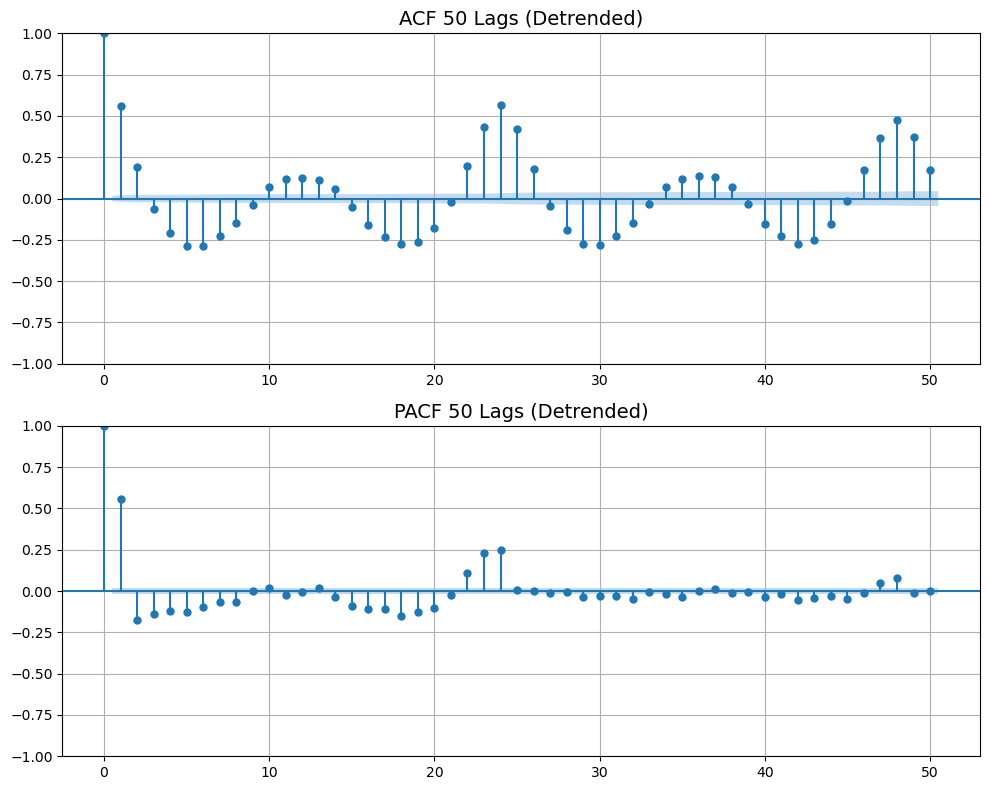

In [66]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig1, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))  


plot_acf(df['detrended'], lags=50, alpha=0.05, ax=ax1)
ax1.set_title('ACF 50 Lags (Detrended)', fontsize=14)
ax1.grid(True) 

plot_pacf(df['detrended'], lags=50, alpha=0.05, ax=ax2)
ax2.set_title('PACF 50 Lags (Detrended)', fontsize=14)
ax2.grid(True) 


plt.tight_layout()
plt.show()


### Removing seasonal component 

In [67]:

df['detrend_deseason'] = df['detrended'].diff(24)

df = df.dropna()

/var/folders/f_/j_mdbrm574j13dk_c3yb57xm0000gn/T/ipykernel_3970/2147697893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['detrend_deseason'] = df['detrended'].diff(24)


In [68]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss
from arch.unitroot import ZivotAndrews


ts = df['detrend_deseason']

# Augmented Dickey-Fuller Test
adf_result = adfuller(ts, autolag='AIC')
print("ADF Statistic: %f" % adf_result[0])
print("p-value: %f" % adf_result[1])
print("Critical Values:")
for key, value in adf_result[4].items():
    print('\t%s: %.3f' % (key, value))

# Kwiatkowski-Phillips-Schmidt-Shin Test
kpss_result = kpss(ts, regression='c', nlags='auto')
print("\nKPSS Statistic: %f" % kpss_result[0])
print("p-value: %f" % kpss_result[1])
print("Critical Values:")
for key, value in kpss_result[3].items():
    print('\t%s: %.3f' % (key, value))

# Zivot-Andrews Test
za_result = ZivotAndrews(ts)
print("\nZivot-Andrews Statistic: %f" % za_result.stat)
print("p-value: %f" % za_result.pvalue)
print("Critical Values:")
for key, value in za_result.critical_values.items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -24.915586
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567

KPSS Statistic: 0.002088
p-value: 0.100000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/var/folders/f_/j_mdbrm574j13dk_c3yb57xm0000gn/T/ipykernel_3970/2217014039.py:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(ts, regression='c', nlags='auto')



Zivot-Andrews Statistic: -24.927683
p-value: 0.000010
Critical Values:
	1%: -5.276
	5%: -4.811
	10%: -4.566


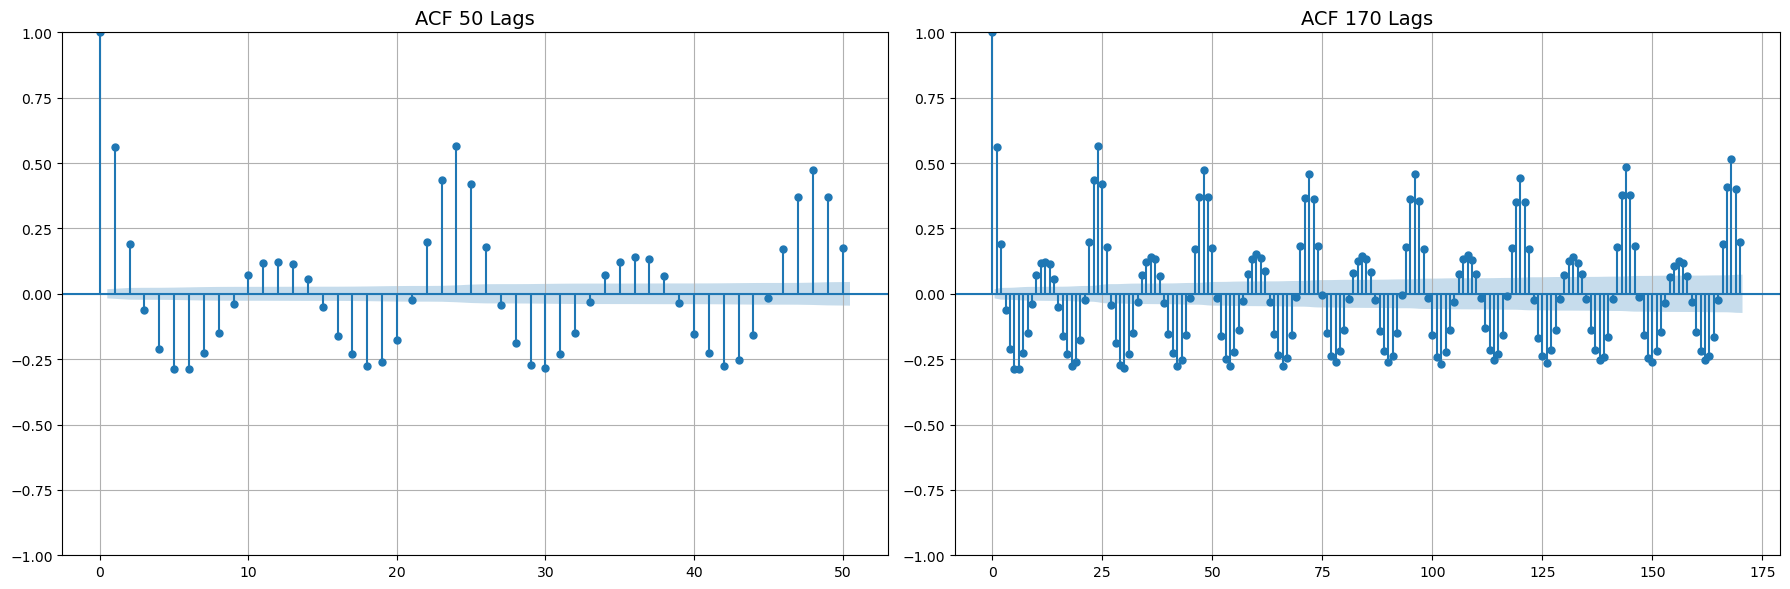

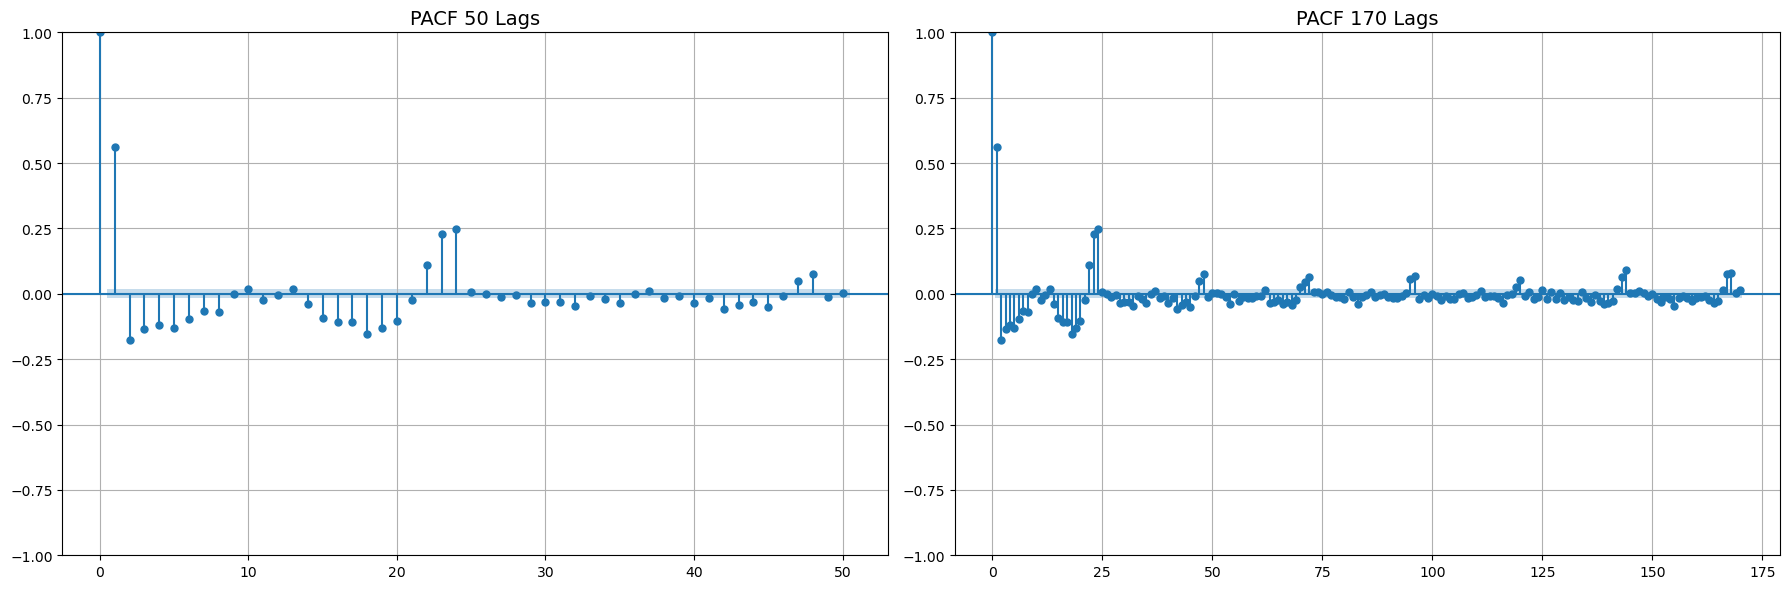

In [69]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))  


plot_acf(df['detrended'], lags=50, alpha=0.05, ax=ax1)
ax1.set_title('ACF 50 Lags', fontsize=14)
#ax1.set_xlabel('Lags', fontsize=12)
#ax1.set_ylabel('Autocorrelation', fontsize=12)
ax1.grid(True)  


plot_acf(df['detrended'], lags=170, alpha=0.05, ax=ax2)
ax2.set_title('ACF 170 Lags', fontsize=14)
#ax2.set_xlabel('Lags', fontsize=12)
#ax2.set_ylabel('Autocorrelation', fontsize=12)
ax2.grid(True)  

plt.tight_layout()
plt.show()

fig1, (ax3, ax4) = plt.subplots(1, 2, figsize=(18, 6))  


plot_pacf(df['detrended'], lags=50, alpha=0.05, ax=ax3)
ax3.set_title('PACF 50 Lags', fontsize=14)
#ax3.set_xlabel('Lags', fontsize=12)
#ax3.set_ylabel('Partial Autocorrelation', fontsize=12)
ax3.grid(True)  

plot_pacf(df['detrended'], lags=170, alpha=0.05, ax=ax4)
ax4.set_title('PACF 170 Lags', fontsize=14)
#ax4.set_xlabel('Lags', fontsize=12)
#ax4.set_ylabel('Partial Autocorrelation', fontsize=12)
ax4.grid(True)  


plt.tight_layout()
plt.show()

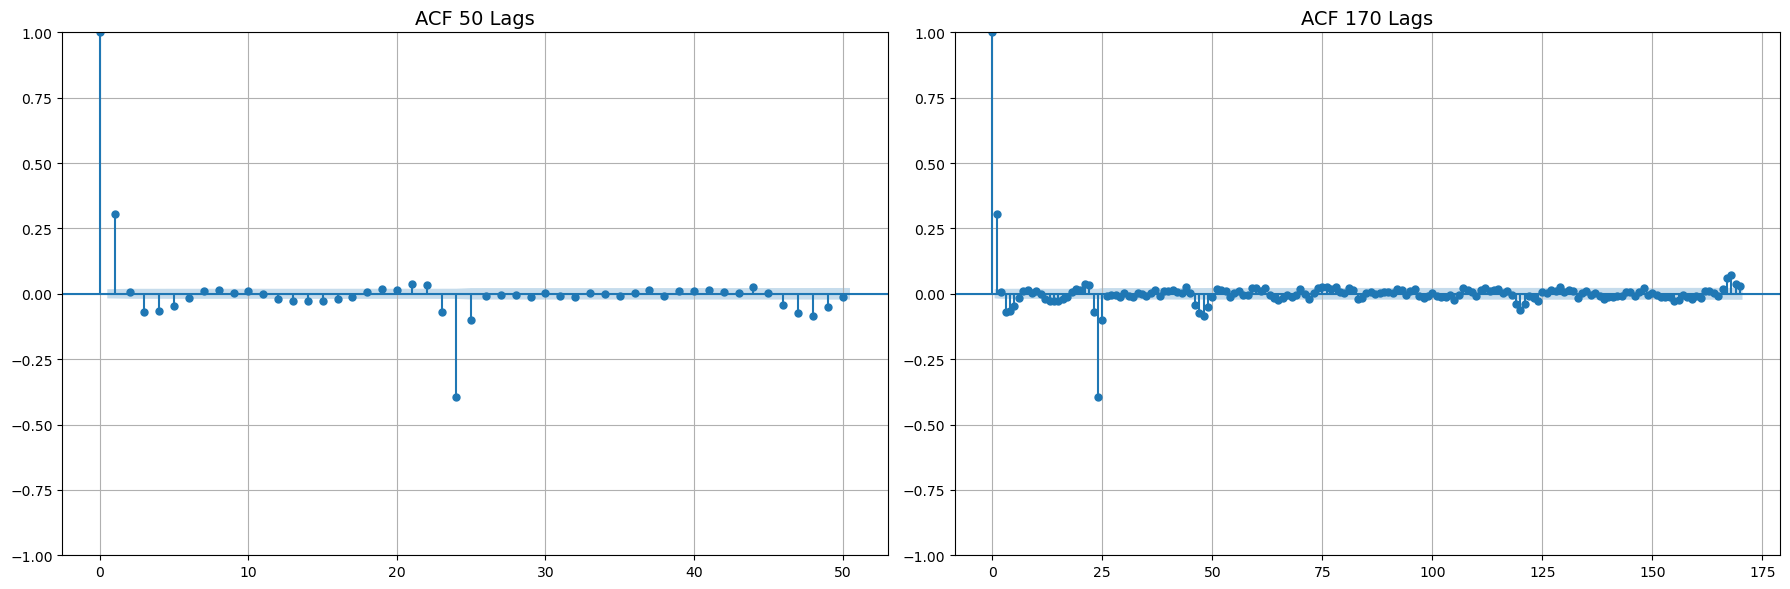

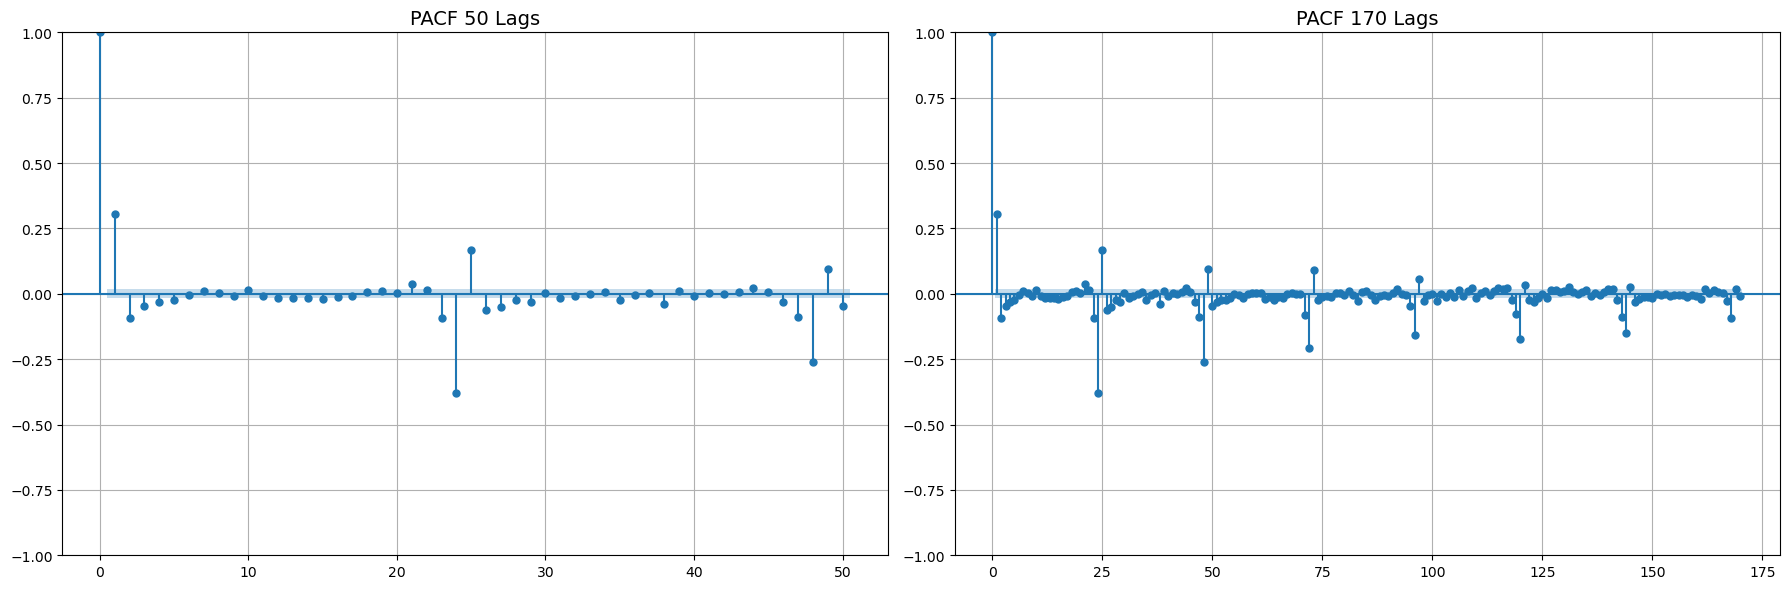

In [70]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))  


plot_acf(df['detrend_deseason'], lags=50, alpha=0.05, ax=ax1)
ax1.set_title('ACF 50 Lags', fontsize=14)
#ax1.set_xlabel('Lags', fontsize=12)
#ax1.set_ylabel('Autocorrelation', fontsize=12)
ax1.grid(True)  

# Second Plot with 170 Lags - ACF
plot_acf(df['detrend_deseason'], lags=170, alpha=0.05, ax=ax2)
ax2.set_title('ACF 170 Lags', fontsize=14)
#ax2.set_xlabel('Lags', fontsize=12)
#ax2.set_ylabel('Autocorrelation', fontsize=12)
ax2.grid(True)  

plt.tight_layout()
plt.show()

fig1, (ax3, ax4) = plt.subplots(1, 2, figsize=(18, 6))  


plot_pacf(df['detrend_deseason'], lags=50, alpha=0.05, ax=ax3)
ax3.set_title('PACF 50 Lags', fontsize=14)
#ax3.set_xlabel('Lags', fontsize=12)
#ax3.set_ylabel('Partial Autocorrelation', fontsize=12)
ax3.grid(True)  

plot_pacf(df['detrend_deseason'], lags=170, alpha=0.05, ax=ax4)
ax4.set_title('PACF 170 Lags', fontsize=14)
#ax4.set_xlabel('Lags', fontsize=12)
#ax4.set_ylabel('Partial Autocorrelation', fontsize=12)
ax4.grid(True)  


plt.tight_layout()
plt.show()

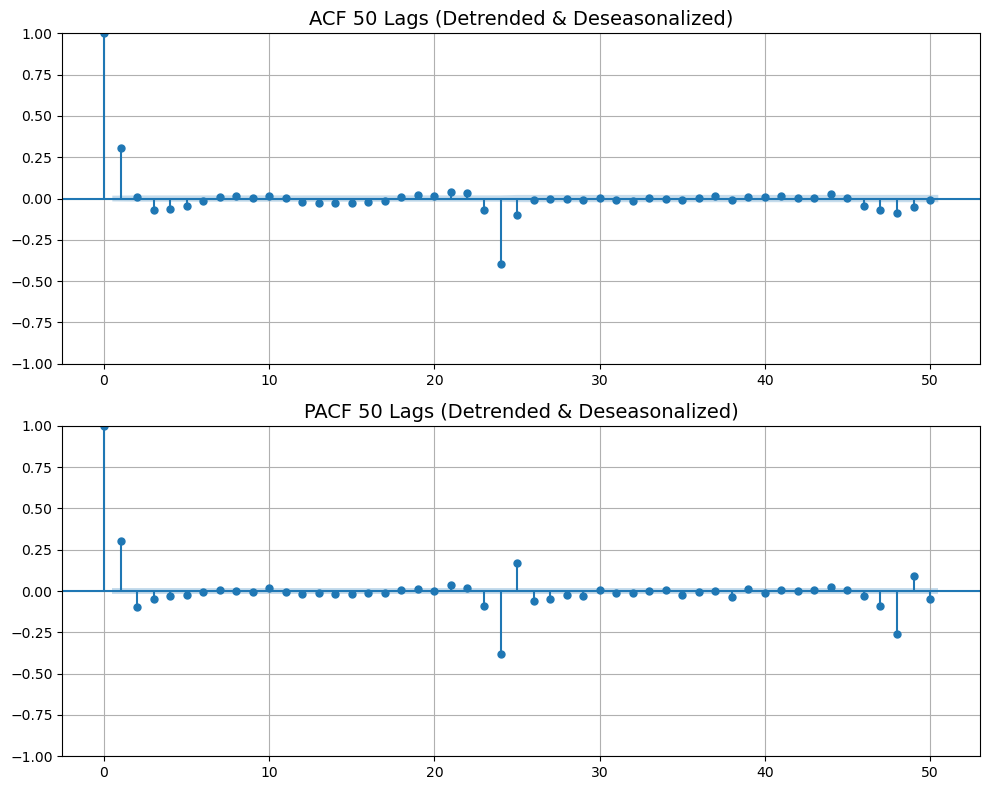

In [72]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


fig1, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8)) 


plot_acf(df['detrend_deseason'], lags=50, alpha=0.05, ax=ax1)
ax1.set_title('ACF 50 Lags (Detrended & Deseasonalized)', fontsize=14)
ax1.grid(True)  


plot_pacf(df['detrend_deseason'], lags=50, alpha=0.05, ax=ax2)
ax2.set_title('PACF 50 Lags (Detrended & Deseasonalized)', fontsize=14)
ax2.grid(True) 


plt.tight_layout()
plt.show()


In [73]:
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Perform Box-Cox transformation
df['detrend_deseason_boxcox'], lambda_value = boxcox(df['detrend_deseason'] + 1)  # Adding 1 to avoid zero values

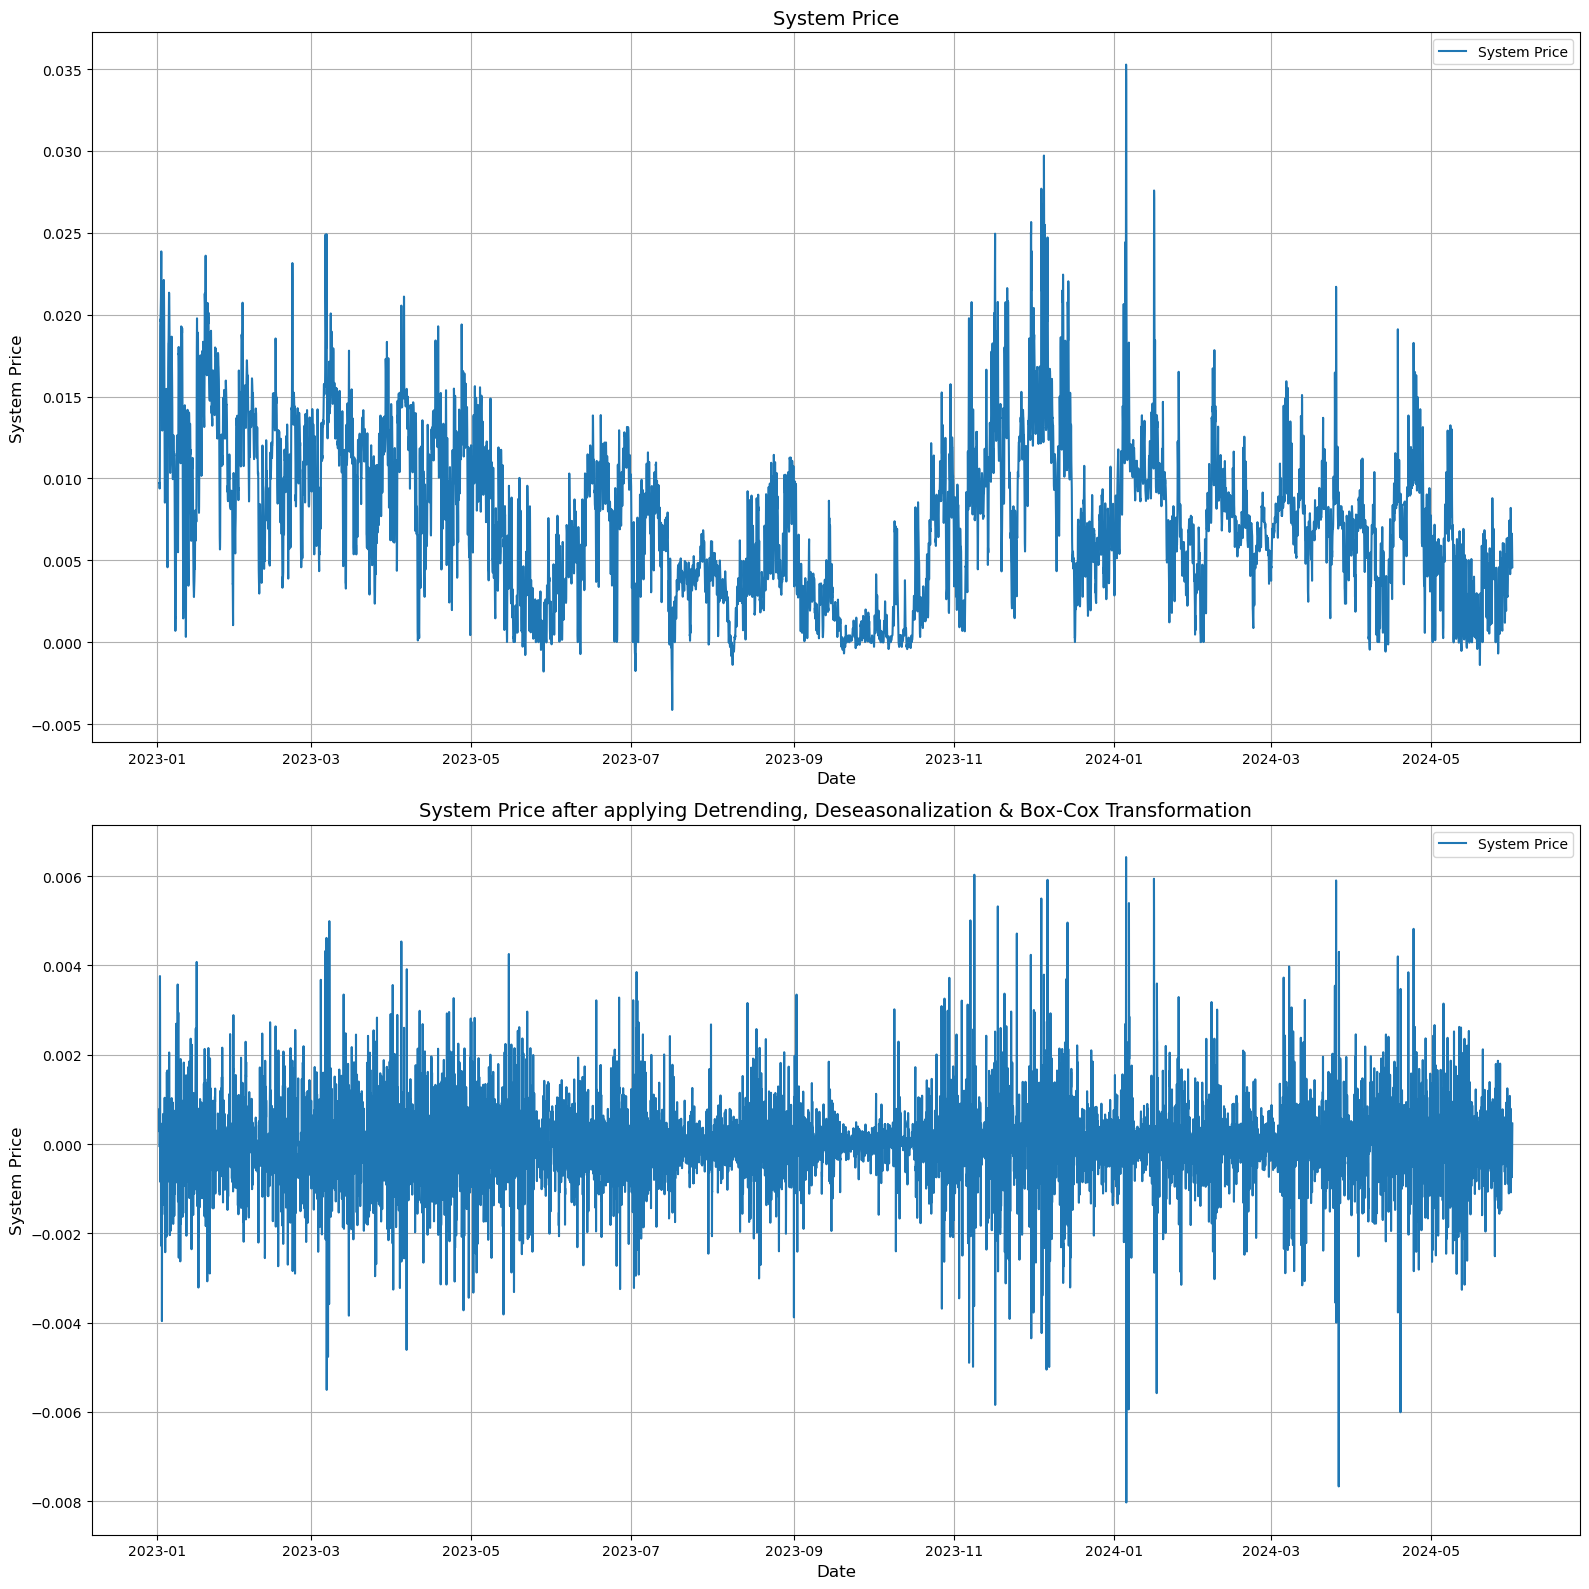

In [74]:
import matplotlib.pyplot as plt


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 16))  


ax1.plot(df.index, df["System Price"], label='System Price')
ax1.set_title('System Price', fontsize=14)  
ax1.set_xlabel('Date', fontsize=12)  
ax1.set_ylabel('System Price', fontsize=12)  
ax1.legend()  
ax1.grid(True)

ax2.plot(df.index, df["detrend_deseason_boxcox"], label='System Price')
ax2.set_title('System Price after applying Detrending, Deseasonalization & Box-Cox Transformation', fontsize=14)  
ax2.set_xlabel('Date', fontsize=12)  
ax2.set_ylabel('System Price', fontsize=12)  
ax2.legend()  
ax2.grid(True)


plt.tight_layout()


plt.show()


# Detrend/deseason all features

In [75]:
df.columns

Index(['System Price', 'NO1 Price', 'NO2 Price', 'NO3 Price', 'NO4 Price',
       'NO5 Price', 'SE1 Price', 'SE2 Price', 'SE3 Price', 'SE4 Price',
       'DK1 Price', 'DK2 Price', 'FI Price', 'Total_Volume',
       'Settled wind production SE', 'Settled wind production DK',
       'Settled wind production FI', 'Settled wind production NO', 'Oil',
       'Coal', 'Gas', 'Permit', 'Precip NO', 'Temp NO', 'Weekend',
       'Christmas vacation', 'Public holiday', 'Winter Time',
       'Total Consumption', 'Total Production', 'System Price Lag 1',
       'System Price Lag 2', 'System Price Lag 3', 'System Price Lag 24',
       'System Price Lag 48', 'System Price Lag 168', 'detrended',
       'detrend_deseason', 'detrend_deseason_boxcox'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

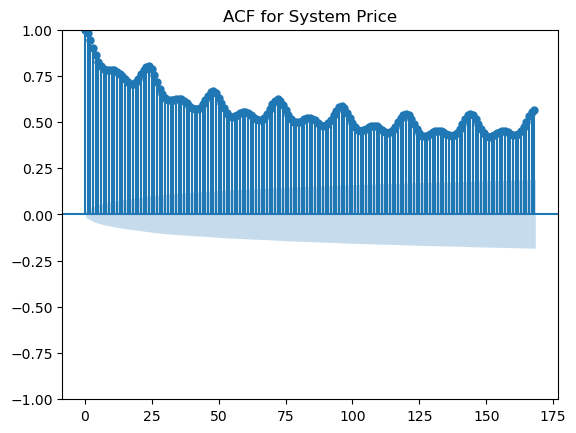

<Figure size 1000x600 with 0 Axes>

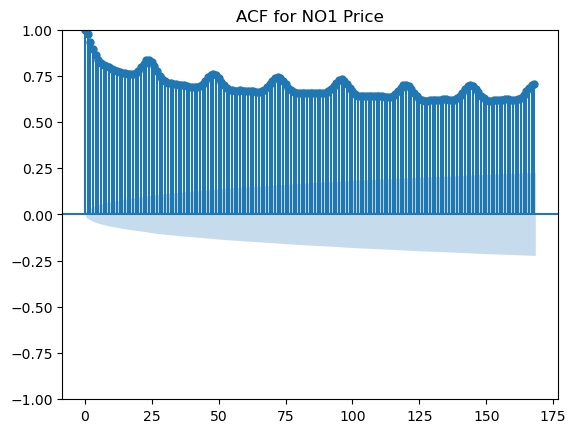

<Figure size 1000x600 with 0 Axes>

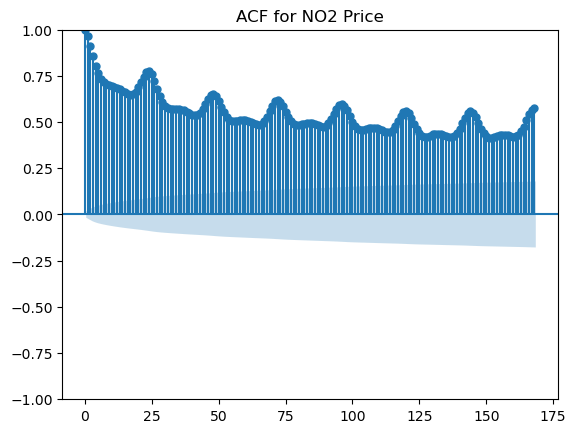

<Figure size 1000x600 with 0 Axes>

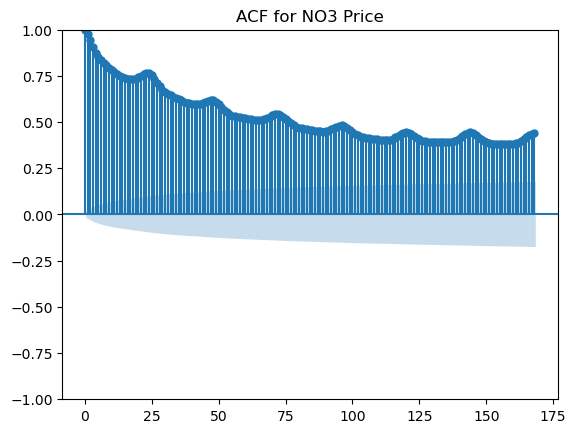

<Figure size 1000x600 with 0 Axes>

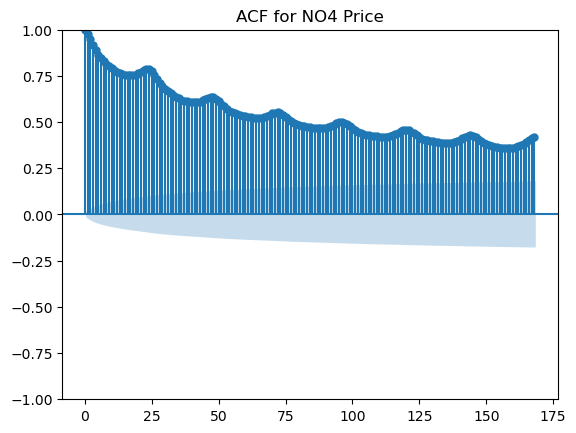

<Figure size 1000x600 with 0 Axes>

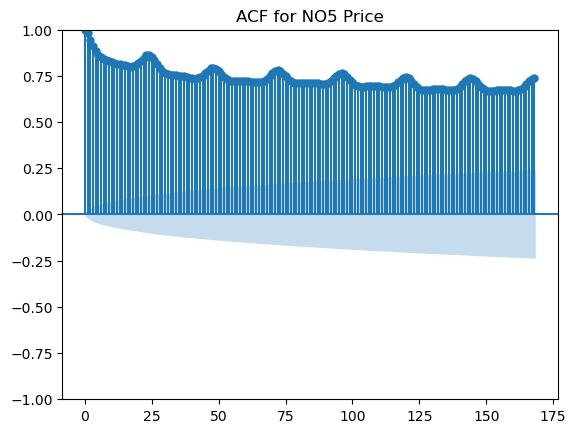

<Figure size 1000x600 with 0 Axes>

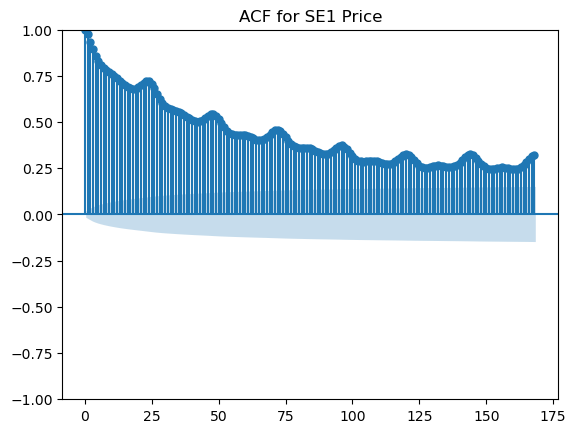

<Figure size 1000x600 with 0 Axes>

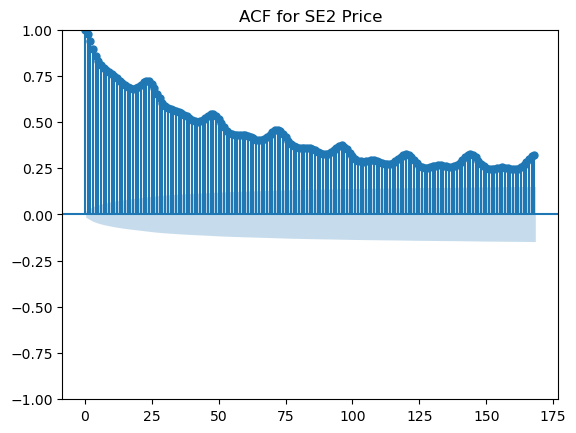

<Figure size 1000x600 with 0 Axes>

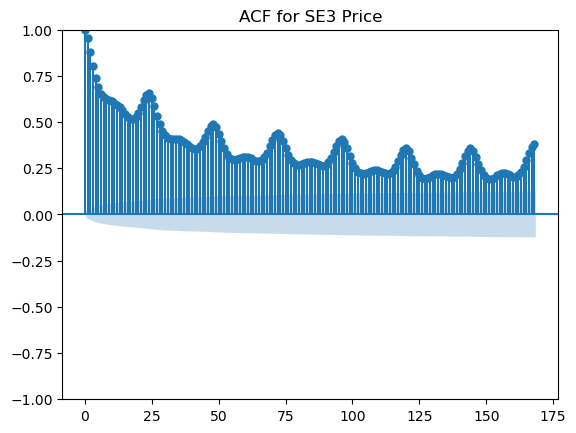

<Figure size 1000x600 with 0 Axes>

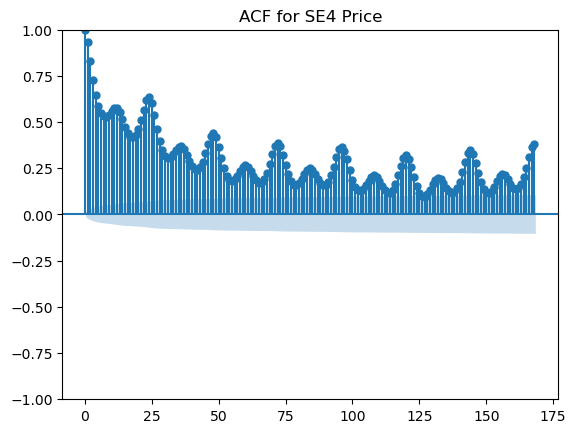

<Figure size 1000x600 with 0 Axes>

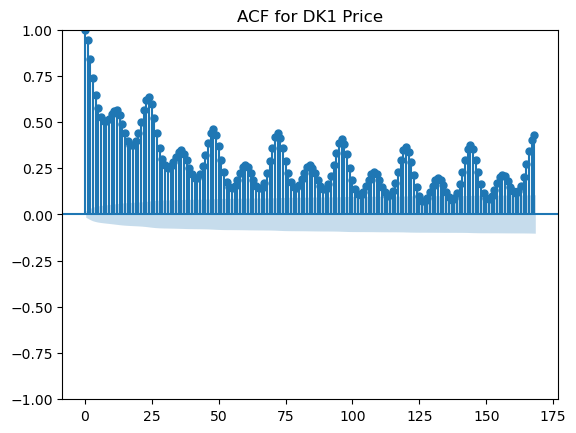

<Figure size 1000x600 with 0 Axes>

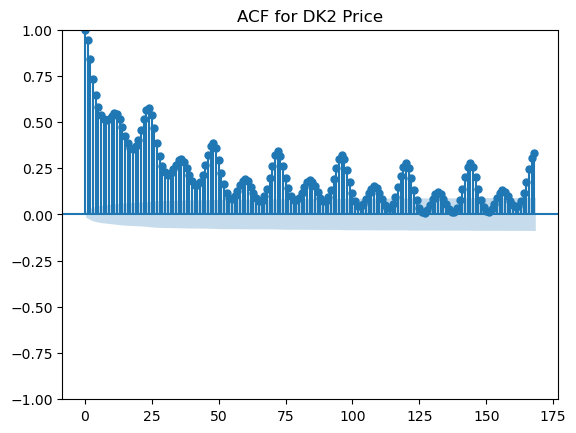

<Figure size 1000x600 with 0 Axes>

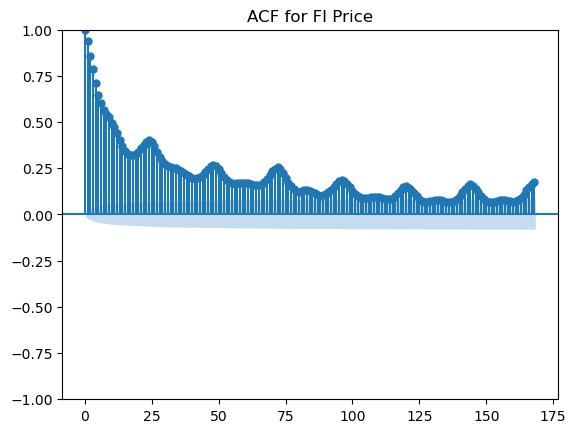

<Figure size 1000x600 with 0 Axes>

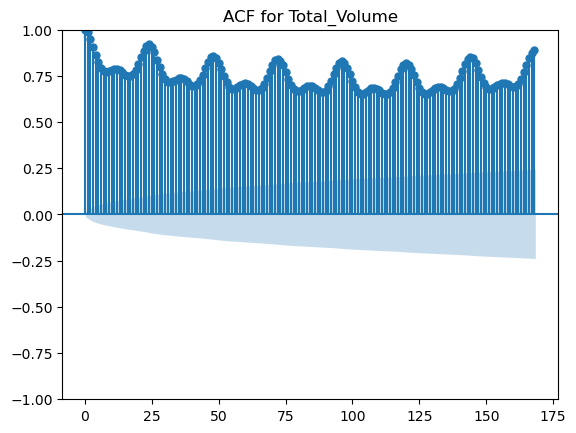

<Figure size 1000x600 with 0 Axes>

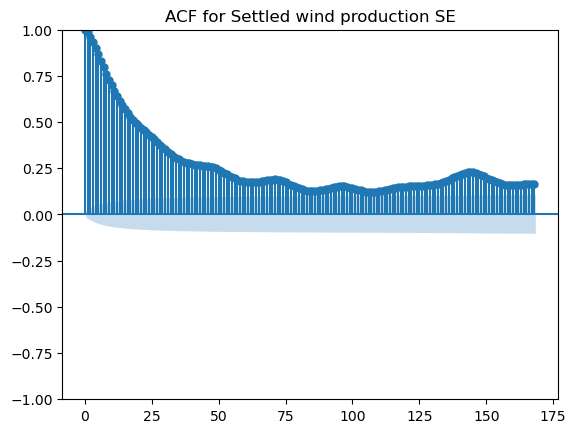

<Figure size 1000x600 with 0 Axes>

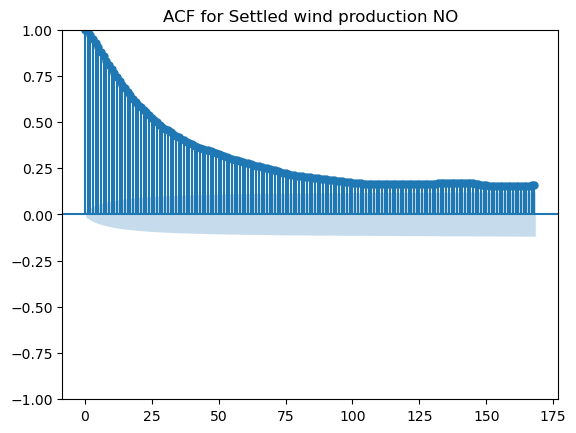

<Figure size 1000x600 with 0 Axes>

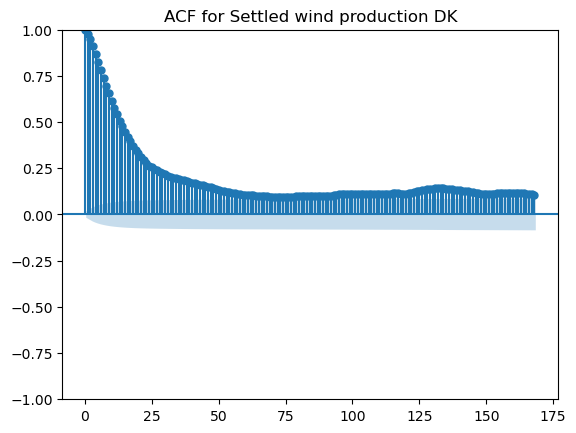

<Figure size 1000x600 with 0 Axes>

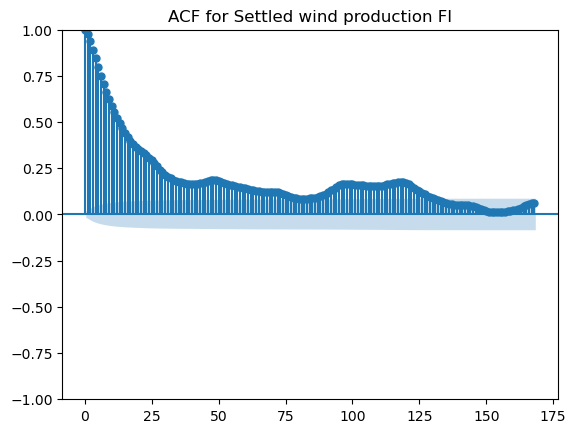

<Figure size 1000x600 with 0 Axes>

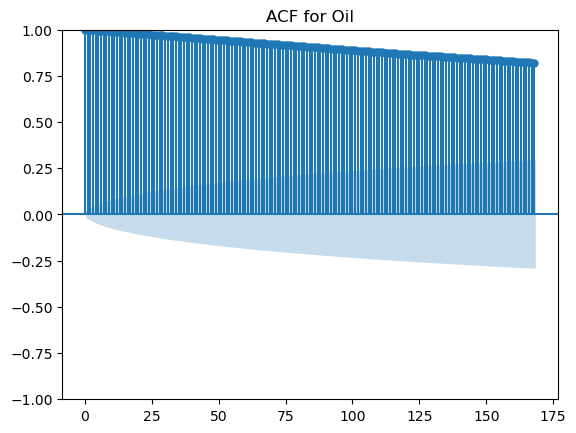

<Figure size 1000x600 with 0 Axes>

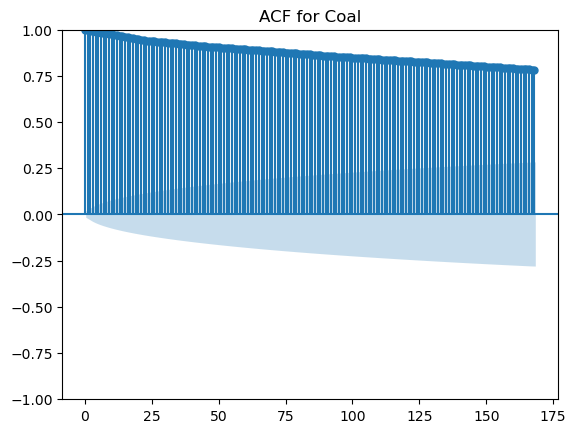

<Figure size 1000x600 with 0 Axes>

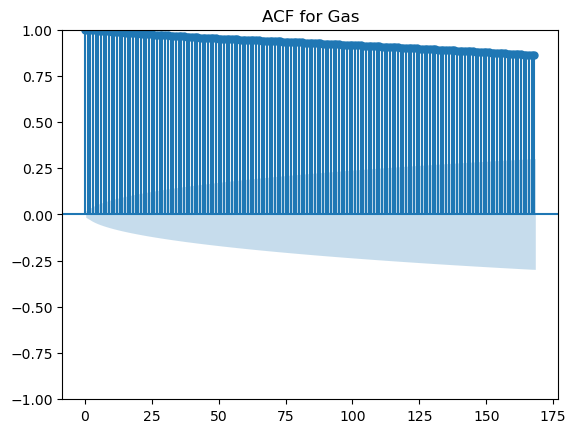

<Figure size 1000x600 with 0 Axes>

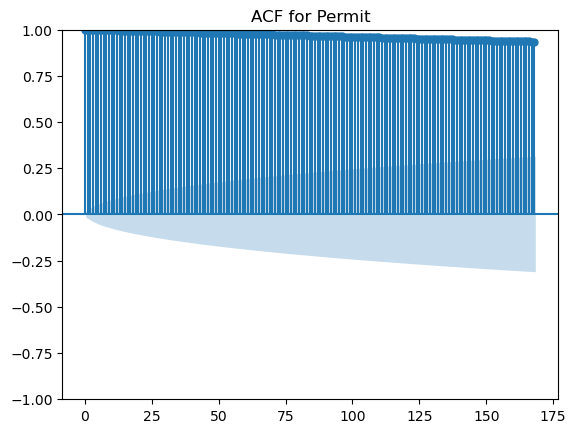

<Figure size 1000x600 with 0 Axes>

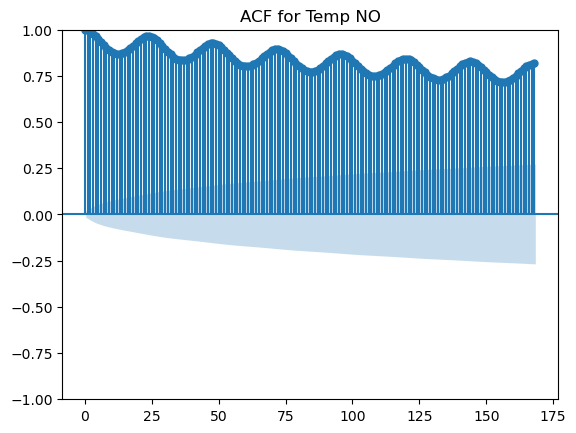

<Figure size 1000x600 with 0 Axes>

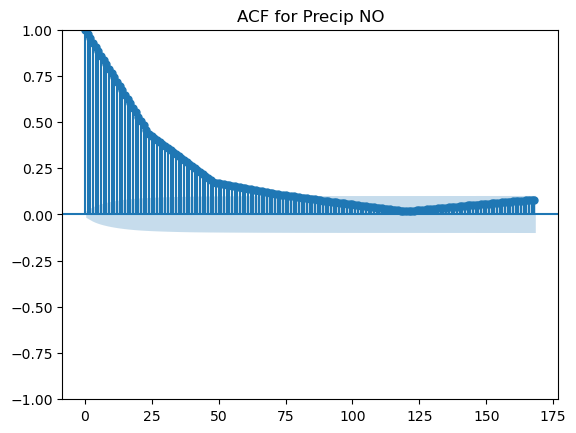

<Figure size 1000x600 with 0 Axes>

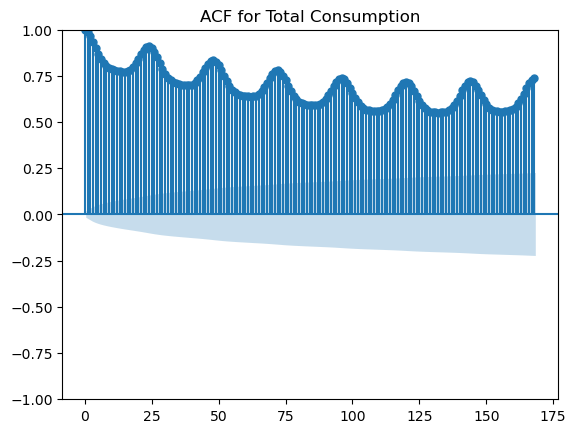

<Figure size 1000x600 with 0 Axes>

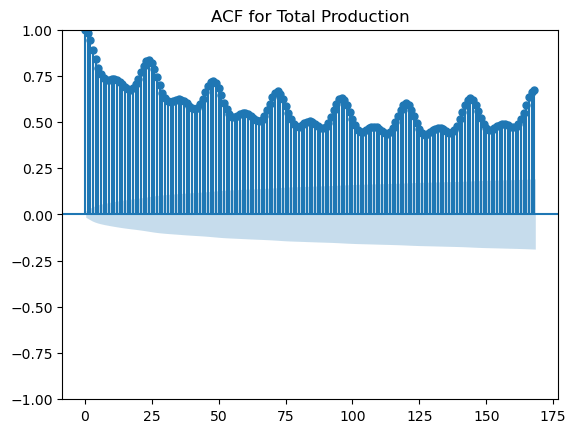

<Figure size 1000x600 with 0 Axes>

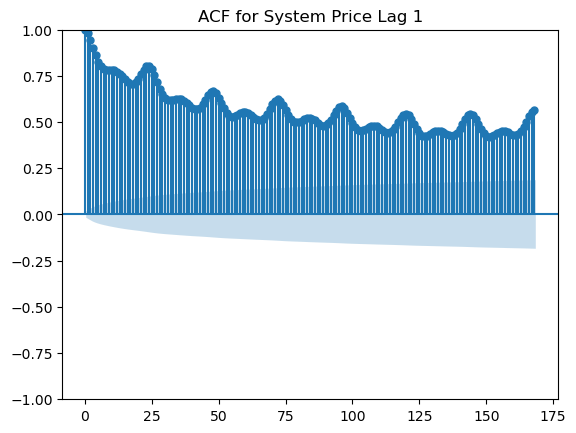

<Figure size 1000x600 with 0 Axes>

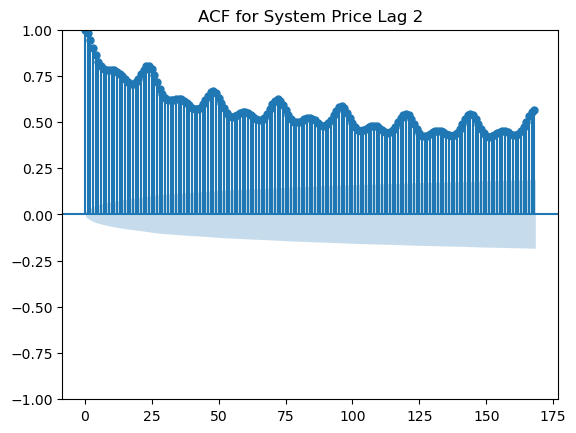

<Figure size 1000x600 with 0 Axes>

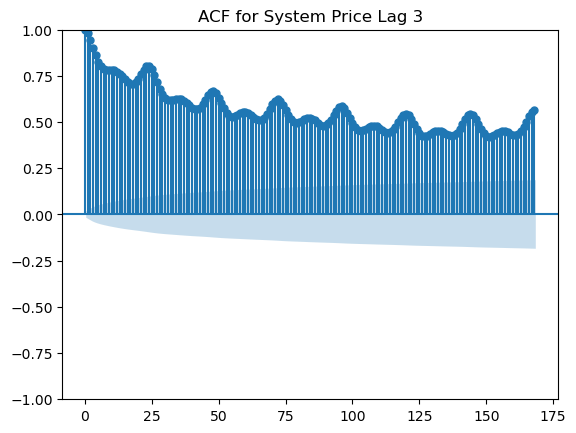

<Figure size 1000x600 with 0 Axes>

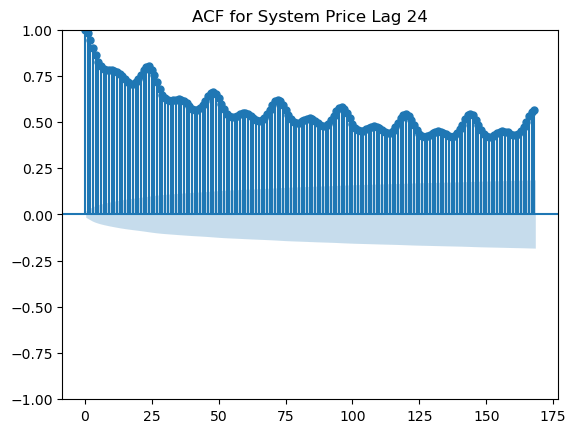

<Figure size 1000x600 with 0 Axes>

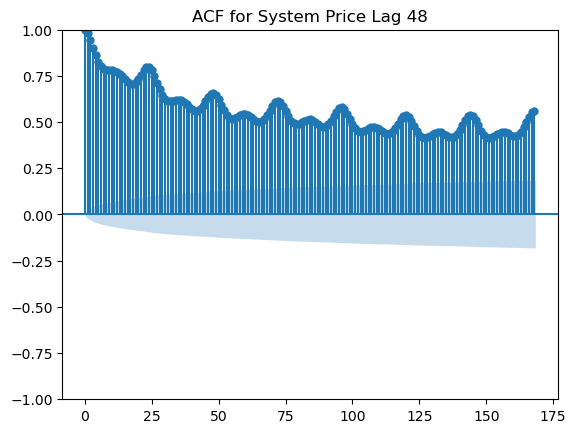

<Figure size 1000x600 with 0 Axes>

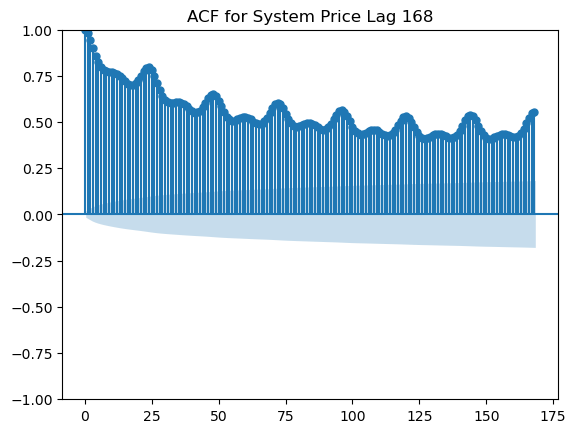

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf


# List of features to plot ACF for (excluding the dummy variables)
features = ['System Price', 'NO1 Price', 'NO2 Price', 'NO3 Price', 'NO4 Price',
            'NO5 Price', 'SE1 Price', 'SE2 Price', 'SE3 Price', 'SE4 Price',
            'DK1 Price', 'DK2 Price', 'FI Price', 'Total_Volume', 'Settled wind production SE',
            'Settled wind production NO','Settled wind production DK', 'Settled wind production FI', 'Oil',
            'Coal', 'Gas', 'Permit', 'Temp NO', 'Precip NO', 'Total Consumption',
            'Total Production', 'System Price Lag 1', 'System Price Lag 2',
            'System Price Lag 3', 'System Price Lag 24', 'System Price Lag 48',
            'System Price Lag 168']


def plot_acf_for_feature(df, feature, lags=168):
    plt.figure(figsize=(10, 6))
    plot_acf(df[feature], lags=lags)
    plt.title(f'ACF for {feature}')
    plt.show()


for feature in features:
    plot_acf_for_feature(df, feature)


### Removing trend and seasonanility from the features with the same trend/seasonality

<Figure size 1000x500 with 0 Axes>

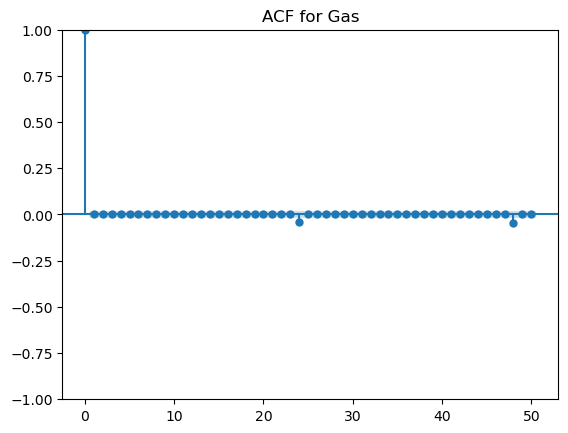

<Figure size 1000x500 with 0 Axes>

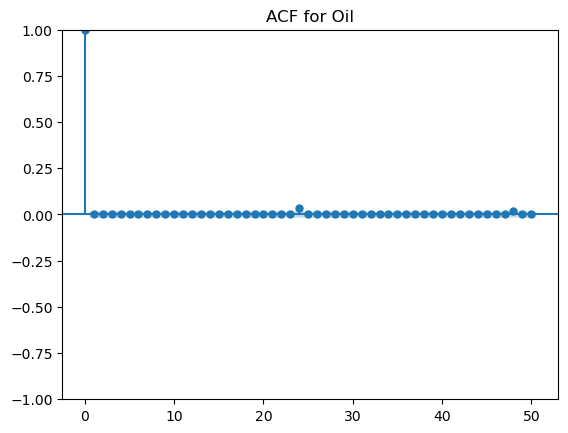

<Figure size 1000x500 with 0 Axes>

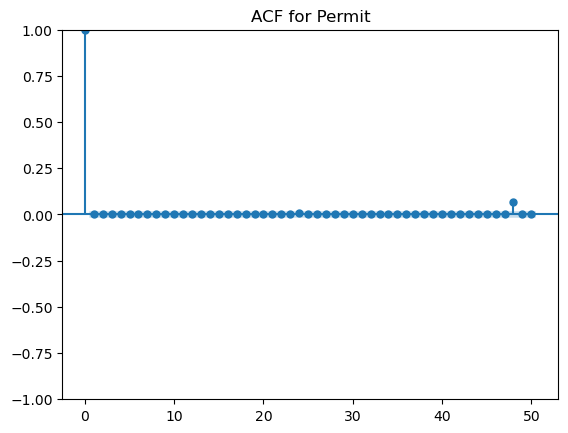

<Figure size 1000x500 with 0 Axes>

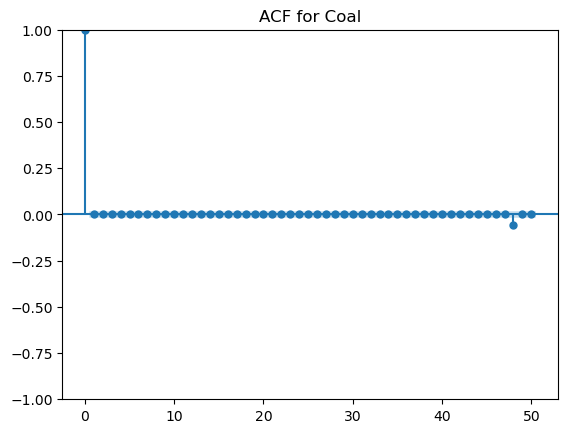

<Figure size 1000x500 with 0 Axes>

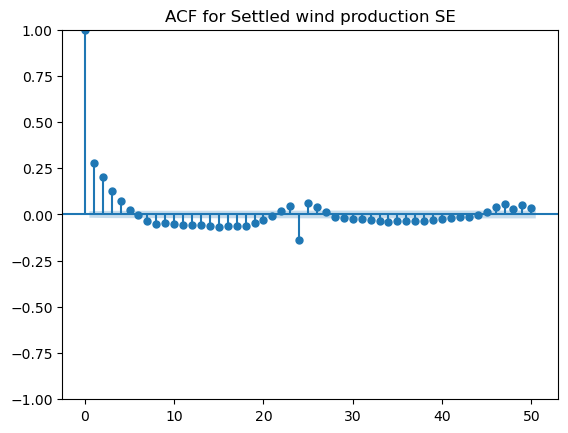

<Figure size 1000x500 with 0 Axes>

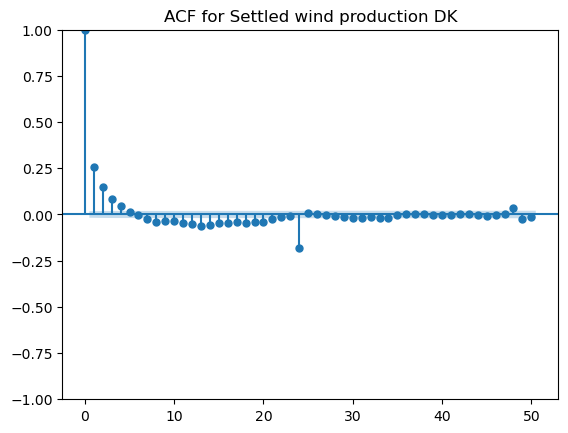

<Figure size 1000x500 with 0 Axes>

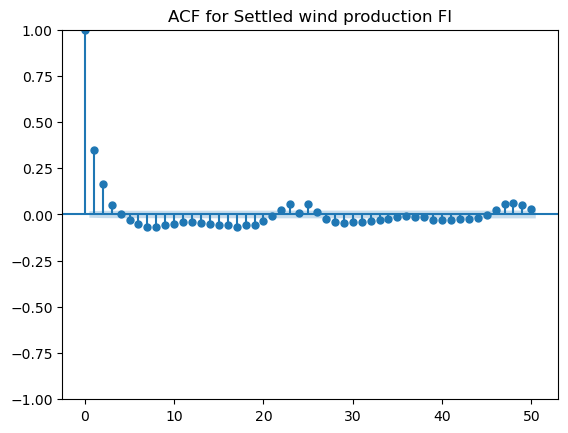

<Figure size 1000x500 with 0 Axes>

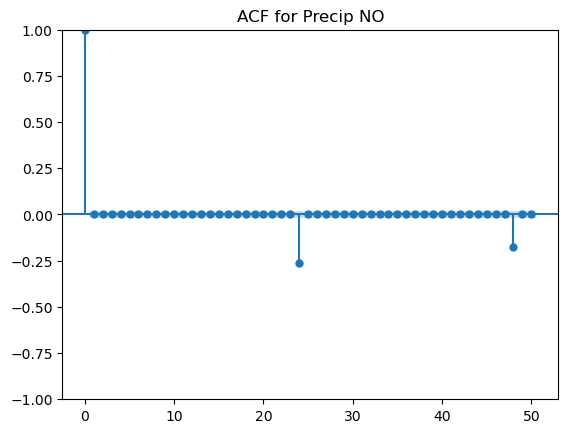

<Figure size 1000x500 with 0 Axes>

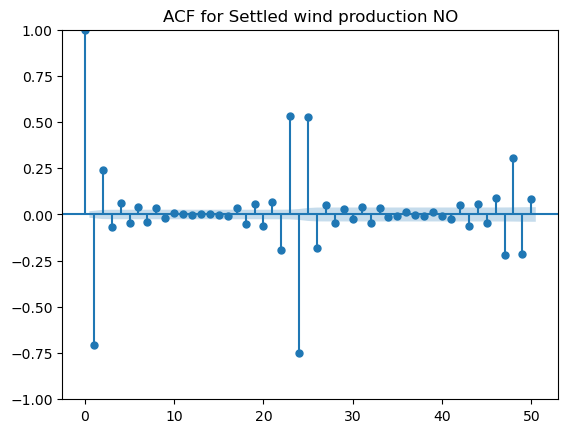

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Features to be differenced
features_to_diff = [
    'Gas', 'Oil', 'Permit', 'Coal', 'Settled wind production SE', 'Settled wind production DK', 
    'Settled wind production FI', 'Precip NO', 'Settled wind production NO'
]

# Apply simple differencing to the features
for feature in features_to_diff:
    df[feature] = df[feature].diff()

# Drop rows with NaN values resulting from differencing
df.dropna(inplace=True)

# Plot ACF for each differenced feature
for feature in features_to_diff:
    plt.figure(figsize=(10, 5))
    plot_acf(df[feature].dropna(), lags=50)
    plt.title(f'ACF for {feature}')
    plt.show()



In [83]:
df

,System Price,NO1 Price,NO2 Price,NO3 Price,NO4 Price,NO5 Price,SE1 Price,SE2 Price,SE3 Price,SE4 Price,...,Public holiday,Winter Time,Gas,Oil,Permit,Coal,Settled wind production SE,Settled wind production DK,Settled wind production FI,Precip NO
DateTime,,,,,,,,,,,,,,,,,,,,,
2023-01-05 05:00:00,-0.000853,-7.18,-7.18,37.22,21.46,-7.18,-2.00,-2.00,-2.00,-2.00,...,0,1,0.0,0.0,0.0,0.0,-401.0,275.0,-269.0,0.0
2023-01-05 06:00:00,0.006706,11.87,11.87,-10.74,-10.05,11.87,112.08,112.08,112.08,112.08,...,0,1,0.0,0.0,0.0,0.0,-567.0,338.0,-389.0,0.0
2023-01-05 07:00:00,-0.010199,-35.43,-35.43,-50.64,-36.75,-35.43,-166.76,-166.76,-33.91,-33.91,...,0,1,0.0,0.0,0.0,0.0,-769.0,204.0,-271.0,0.0
2023-01-05 08:00:00,-0.000354,12.92,12.92,42.18,80.66,12.92,68.86,68.86,-179.73,-179.73,...,0,1,0.0,0.0,0.0,0.0,-587.0,276.0,-51.0,0.0
2023-01-05 09:00:00,0.006107,-2.55,-2.55,-44.89,-50.94,-2.55,-3.08,-3.08,123.88,123.88,...,0,1,0.0,0.0,0.0,0.0,-64.0,306.0,111.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 19:00:00,-0.005310,-23.77,70.10,-0.93,-0.93,-23.77,-4.41,-4.41,-58.65,162.08,...,0,0,0.0,0.0,0.0,0.0,-36.0,60.0,20.0,0.0
2024-05-31 20:00:00,0.007724,-32.05,-44.12,2.36,2.36,-32.05,12.39,12.39,-19.02,-50.99,...,0,0,0.0,0.0,0.0,0.0,88.0,43.0,50.0,0.0
2024-05-31 21:00:00,-0.005242,14.21,9.54,-18.03,-18.03,14.21,-27.66,-27.66,-7.32,-225.88,...,0,0,0.0,0.0,0.0,0.0,243.0,-236.0,46.0,0.0


In [24]:
import pandas as pd

file_path = "/Users/evenbakke/Documents/Master Thesis/MasterThesis-/Complete Data 2024 DTDS.xlsx"  

df.to_excel(file_path, index=True)

print(f"DataFrame has been exported to {file_path}")

DataFrame has been exported to /Users/evenbakke/Documents/Master Thesis/MasterThesis-/Complete Data 2024 DTDS.xlsx
